# 數據處理

In [1]:
# Importing the required libraries
import pandas as pd
pd.set_option('display.max_columns', 50) # Display up to 50 columns at a time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
plt.style.use('seaborn')
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,5
import glob # To read all csv files in the directory
import seaborn as sns
import calendar
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, precision_recall_fscore_support
import itertools
import time
import xgboost as xgb
from matplotlib.font_manager import FontProperties

/var/folders/yn/bx412gns07g22zp4wvy8hf540000gn/T/ipykernel_30243/2360146795.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [2]:
# 設置中文字體
font = FontProperties(fname = '/Users/sandra/Downloads/32515377567.ttf')

In [24]:
df = pd.read_csv('df_2022.csv')
df.shape

(9862, 19)

### 計算blurb的長度

In [25]:
# Count length of each blurb
df['blurb_length'] = df['blurb'].str.split().str.len()

# Drop blurb variable
df.drop('blurb', axis=1, inplace = True)

### Disable_communication
全部的項目作者都沒有禁止通訊

In [26]:
# Checking the proportions of each category
df.disable_communication.value_counts(normalize = True)

False    1.0
Name: disable_communication, dtype: float64

### Is_starrable
在設計類別中，有42.9%的項目可以被收藏

In [27]:
# Figure out what this is, and do a count_values() to figure out whether it's worth including or mostly FALSE
df.is_starrable.value_counts(normalize = True)

True     0.571385
False    0.428615
Name: is_starrable, dtype: float64

### Name
計算項目名稱長度

In [28]:
# Count length of each name
df['name_length'] = df['name'].str.split().str.len()
# Drop name variable
df.drop('name', axis = 1, inplace = True)

### staff_pick
只有10.4%的項目有被工作人員推薦

In [29]:
# Figure out what this is, and do a count_values() to figure out whether it's worth including or mostly FALSE
df.staff_pick.value_counts(normalize = True)

False    0.896066
True     0.103934
Name: staff_pick, dtype: float64

### Usd_goal
四捨五入至整數

In [30]:
df['usd_goal'] = round(df['usd_goal'],0)

### 查看缺失值

In [31]:
df.isna().sum()

deadline                    0
launched_at                 0
backers_count               0
converted_pledged_amount    0
country                     0
disable_communication       0
goal                        0
id                          0
is_starrable                0
staff_pick                  0
state                       0
static_usd_rate             0
created                     0
whole_project               0
duration                    0
waiting_days                0
usd_goal                    0
blurb_length                1
name_length                 2
dtype: int64

In [32]:
# Replacing null values for blurb_length with 0
df.blurb_length.fillna(0, inplace = True)

In [33]:
# Replacing null values for name_length  with 0
df.name_length .fillna(0, inplace = True)

In [34]:
# Confirming there are no null values remaining
df.isna().sum()

deadline                    0
launched_at                 0
backers_count               0
converted_pledged_amount    0
country                     0
disable_communication       0
goal                        0
id                          0
is_starrable                0
staff_pick                  0
state                       0
static_usd_rate             0
created                     0
whole_project               0
duration                    0
waiting_days                0
usd_goal                    0
blurb_length                0
name_length                 0
dtype: int64

### 查看項目狀態統計

In [35]:
# Number of projects of different states
df.state.value_counts()

live          5704
successful    3866
failed         197
canceled        95
Name: state, dtype: int64

In [38]:
df.to_csv('df_2022all.csv', index = False)

In [165]:
df = pd.read_csv('df_2022all.csv')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


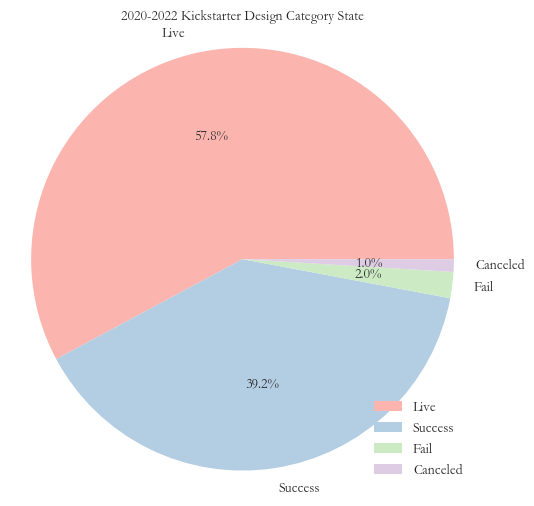

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算狀態的次數
state_counts = df.state.value_counts()

labels = state_counts.index
labels = ['Live', 'Success', 'Fail', 'Canceled']

colors = sns.color_palette('Set2')

# 繪製圓餅圖
plt.figure(figsize = (6, 6))
plt.title('2020-2022 Kickstarter Design Category State', fontsize = 14, fontproperties = font)

plt.legend(loc = "best")
sns.set_palette('Pastel1')
plt.pie(state_counts, labels = labels, autopct='%1.1f%%', 
        pctdistance = 0.6,                # 數字與圓心的距離
        textprops = {"fontsize" : 10.5, "fontproperties": font},    # 文字大小
        shadow = False)
plt.legend(labels = labels, loc = "best", prop = font)
plt.axis('equal')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


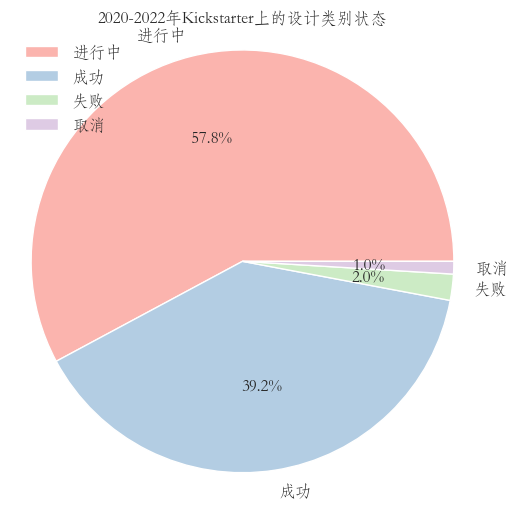

In [166]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算狀態的次數
state_counts = df.state.value_counts()

labels = state_counts.index
labels = ['进行中', '成功', '失败', '取消']

colors = sns.color_palette('Set2')

# 繪製圓餅圖
plt.figure(figsize = (6, 6))
plt.title('2020-2022年Kickstarter上的设计类别状态', fontsize = 14, fontproperties = font)

plt.legend(loc = "best")
sns.set_palette('Pastel1')
plt.pie(state_counts, labels = labels, autopct='%1.1f%%', 
        pctdistance = 0.6,                # 数字距圆心的距离
        textprops = {"fontsize" : 10.5, "fontproperties": font},    # 文字大小
        shadow = False)
plt.legend(labels = labels, loc = "best", prop = font)
plt.axis('equal')
plt.show()

In [109]:
df = pd.read_csv('df_2022all.csv')
# Dropping projects which are not successes or failures
df = df[df['state'].isin(['successful', 'failed'])]

In [110]:
df.to_csv('df_20_22_success.csv', index = False)

# EDA

In [3]:
df = pd.read_csv('df_20_22_success.csv')
df.shape

(4063, 19)

### Key statistics

In [53]:
# Summary statistics for the numerical features
df.describe()

,backers_count,converted_pledged_amount,goal,whole_project,duration,waiting_days,usd_goal,blurb_length,name_length,pledge_per_backer
count,4063.000000,4.063000e+03,4.063000e+03,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000
mean,565.978587,6.700142e+04,3.151589e+04,107.597342,31.046517,76.550825,9693.797686,14.742309,6.580605,142.557962
std,1974.672383,2.400074e+05,2.192556e+05,158.252720,11.114952,156.962840,26175.586859,5.667315,2.518144,199.349038
min,1.000000,0.000000e+00,1.000000e+00,7.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,41.000000,3.093500e+03,1.500000e+03,43.000000,27.000000,13.000000,1036.500000,10.000000,5.000000,47.000000
50%,108.000000,1.159600e+04,5.000000e+03,65.000000,30.000000,32.000000,4786.000000,15.000000,7.000000,81.000000
75%,373.500000,4.226000e+04,1.500000e+04,111.000000,35.000000,78.000000,10000.000000,19.000000,8.000000,159.000000
max,55236.000000,6.391763e+06,1.136600e+07,2825.000000,75.000000,2795.000000,682302.000000,29.000000,14.000000,4695.000000


In [56]:
print("Key stats:")
print("\nThe total amount of money that projects have aimed to raise is ${0:,.0f}".format(df.usd_goal.sum()))
print("The total amount of money pledged by backers is ${0:,.0f}".format(df.converted_pledged_amount.sum()))
print("The total amount of money pledged by backers to successful projects is ${0:,.0f}".format(sum(df.loc[df['state'] == 'successful'].converted_pledged_amount)))

print("\nThe total number of successful or failed projects launched on Kickstarter is: {0:,}".format(len(df)))
print("The total number of projects which were successfully funded is: {0:,}".format(len(df.loc[df['state'] == 'successful'])))
print(f"The proportion of completed projects which were successfully funded is: {int(round((len(df.loc[df['state'] == 'successful'])/len(df))*100,0))}%")

print("\nThe mean project fundraising goal is ${0:,.0f}".format(df.usd_goal.mean()))
print("The mean amount pledged per project is ${0:,.0f}".format(df.converted_pledged_amount.mean()))
print("The mean amount pledged per successful project is ${0:,.0f}".format(df.loc[df['state'] == 'successful'].converted_pledged_amount.mean()))
print("The mean amount pledged per failed project is ${0:,.0f}".format(df.loc[df['state'] == 'failed'].converted_pledged_amount.mean()))
      
print("\nThe mean number of backers per project is", int(round(df.backers_count.mean(),0)))
print("The mean pledge per backer is ${0:,.0f}".format(df.pledge_per_backer.mean()))
print("The mean number of days a campaign is run for is", int(round(df.duration.mean(),0)))

Key stats:

The total amount of money that projects have aimed to raise is $39,385,900
The total amount of money pledged by backers is $272,226,788
The total amount of money pledged by backers to successful projects is $272,036,830

The total number of successful or failed projects launched on Kickstarter is: 4,063
The total number of projects which were successfully funded is: 3,866
The proportion of completed projects which were successfully funded is: 95%

The mean project fundraising goal is $9,694
The mean amount pledged per project is $67,001
The mean amount pledged per successful project is $70,366
The mean amount pledged per failed project is $964

The mean number of backers per project is 566
The mean pledge per backer is $143
The mean number of days a campaign is run for is 31


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


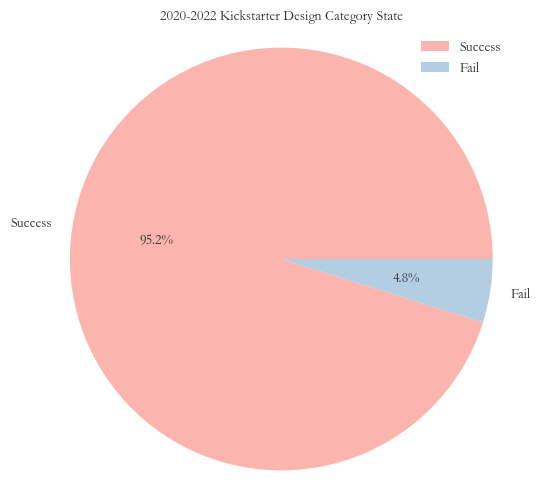

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

# 計算狀態的次數
state_counts = df.state.value_counts()

labels = state_counts.index
labels = ['Success', 'Fail']

colors = sns.color_palette('Set2')

# 繪製圓餅圖
plt.figure(figsize = (6, 6))
plt.title('2020-2022 Kickstarter Design Category State', fontsize = 14, fontproperties = font)

plt.legend(loc = "best")
sns.set_palette('Pastel1')
plt.pie(state_counts, labels = labels, autopct='%1.1f%%', 
        pctdistance = 0.6,                # 数字距圆心的距离
        textprops = {"fontsize" : 10.5, "fontproperties": font},    # 文字大小
        shadow = False)
plt.legend(labels = labels, loc = "best", prop = font)
plt.axis('equal')
plt.show()

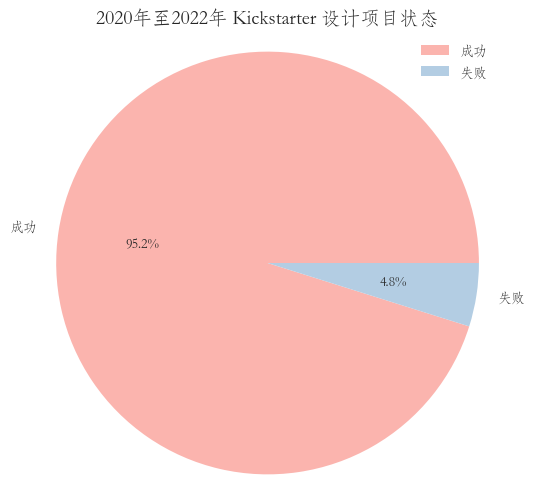

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# 設置中文字體
font = FontProperties(fname = '/Users/sandra/Downloads/32515377567.ttf', size=10)

# 計算狀態的次數
state_counts = df.state.value_counts()

labels = state_counts.index
labels = ['成功', '失败']

colors = sns.color_palette('Set2')

# 繪製圓餅圖
plt.figure(figsize = (6, 6))
plt.title('2020年至2022年 Kickstarter 设计项目状态', {"fontsize" : 14, "fontproperties": font})
plt.pie(state_counts, labels = labels, autopct = '%1.1f%%', 
        pctdistance = 0.6, textprops = {"fontsize": 10.5, 'fontproperties': font}, shadow = False)
plt.legend(labels = labels, loc = "best", prop = font)
plt.axis('equal')
plt.show()

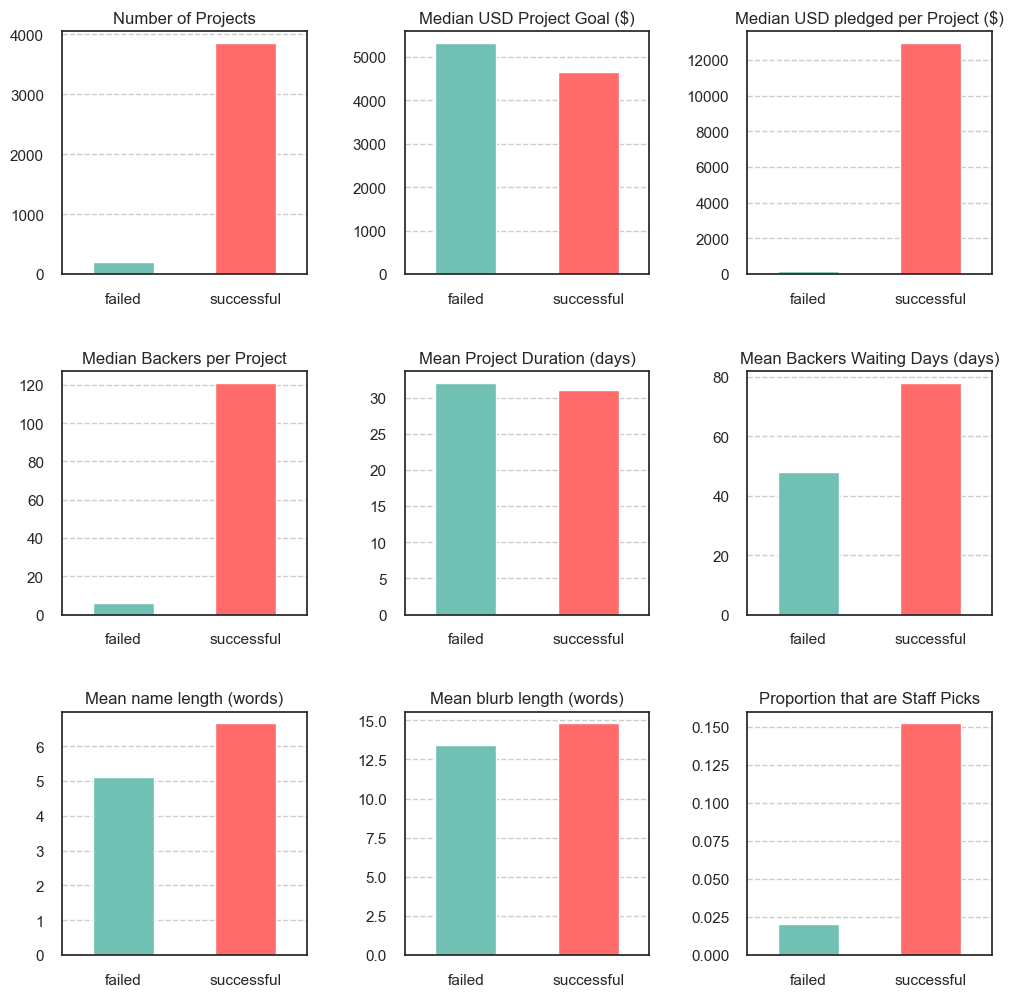

In [133]:
# Setting custom colors
colors = ['#70C1B3', '#FF6B6B']

# Plotting the average amount pledged to successful and unsuccesful projects
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending = True).plot(kind = 'bar', ax=ax1, color = colors, rot=0)
ax1.grid(axis = 'y',linestyle='--')
ax1.set_title('Number of Projects')
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color = colors, rot=0)
ax2.grid(axis = 'y',linestyle='--')
ax2.set_title('Median USD Project Goal ($)')
ax2.set_xlabel('')

df.groupby('state').converted_pledged_amount.median().plot(kind='bar', ax=ax3, color=colors, rot=0)
ax3.grid(axis = 'y',linestyle='--')
ax3.set_title('Median USD pledged per Project ($)')
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=colors, rot=0)
ax4.grid(axis = 'y',linestyle='--')
ax4.set_title('Median Backers per Project')
ax4.set_xlabel('')

df.groupby('state').duration.mean().plot(kind='bar', ax=ax5, color=colors, rot=0)
ax5.grid(axis = 'y',linestyle='--')
ax5.set_title('Mean Project Duration (days)')
ax5.set_xlabel('')

df.groupby('state').waiting_days.mean().plot(kind='bar', ax=ax6, color=colors, rot=0)
ax6.grid(axis = 'y',linestyle='--')
ax6.set_title('Mean Backers Waiting Days (days)')
ax6.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=colors, rot=0)
ax7.grid(axis = 'y',linestyle='--')
ax7.set_title('Mean name length (words)')
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=colors, rot=0)
ax8.grid(axis = 'y',linestyle='--')
ax8.set_title('Mean blurb length (words)')
ax8.set_xlabel('')

# Creating a dataframe grouped by staff_pick with columns for failed and successful
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
# Normalizes counts by column, and selects the 'True' category (iloc[1])
(pick_df.div(pick_df.sum(axis = 0), axis = 1)).iloc[1].plot(kind='bar', ax=ax9, color=colors, rot=0) 
ax9.set_title('Proportion that are Staff Picks')
ax9.set_xlabel('')
ax9.grid(axis = 'y',linestyle='--')


fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


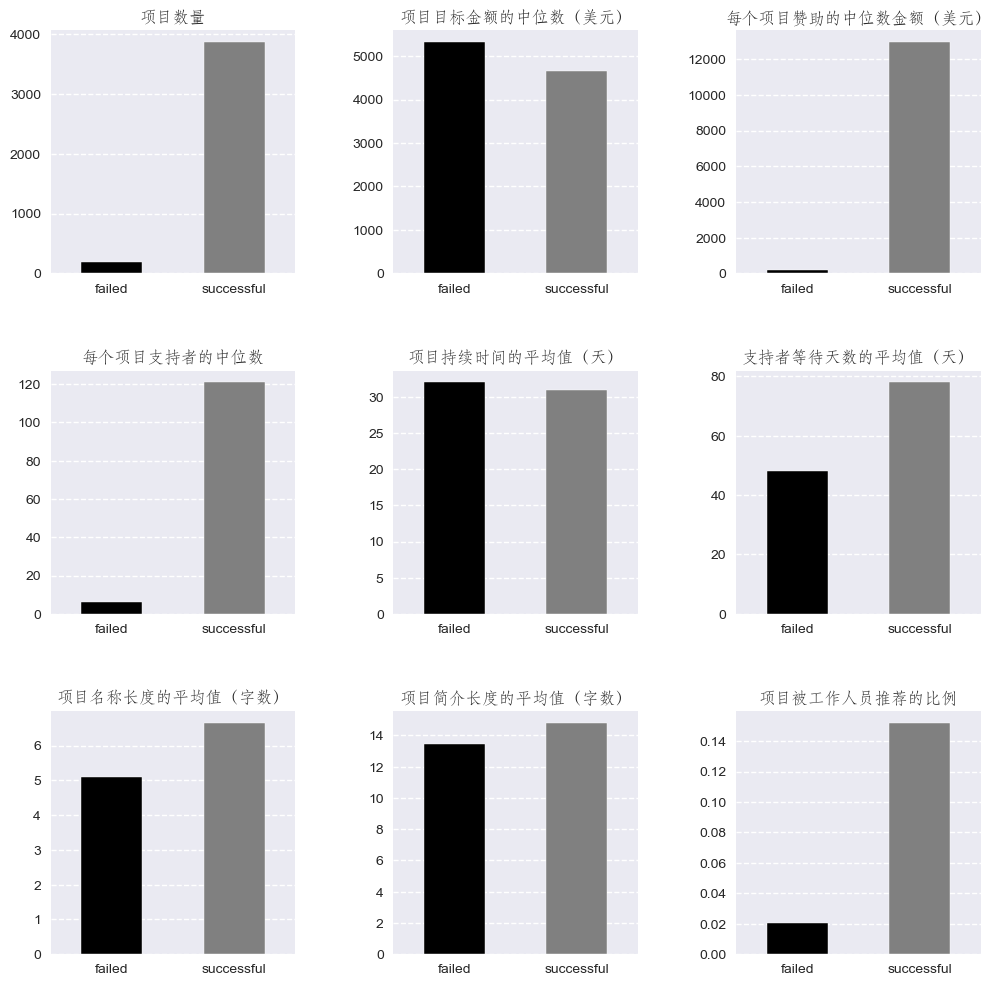

In [40]:
from matplotlib.font_manager import FontProperties

# 設定字體為中文
font = FontProperties(fname='/Users/sandra/Downloads/32515377567.ttf', size = 12)

# 設置自定義顏色
colors = ['black', 'gray']

# 繪製成功和失敗項目的平均贊助金額
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3, 3, figsize=(12,12))

df['state'].value_counts(ascending = True).plot(kind = 'bar', ax=ax1, color = colors, rot=0)
ax1.grid(axis = 'y',linestyle='--')
ax1.set_title('项目数量', fontproperties = font)
ax1.set_xlabel('')

df.groupby('state').usd_goal.median().plot(kind='bar', ax=ax2, color = colors, rot=0)
ax2.grid(axis = 'y',linestyle='--')
ax2.set_title('项目目标金额的中位数（美元）', fontproperties = font)
ax2.set_xlabel('')

df.groupby('state').converted_pledged_amount.median().plot(kind='bar', ax=ax3, color=colors, rot=0)
ax3.grid(axis = 'y',linestyle='--')
ax3.set_title('每个项目赞助的中位数金额（美元）', fontproperties = font)
ax3.set_xlabel('')

df.groupby('state').backers_count.median().plot(kind='bar', ax=ax4, color=colors, rot=0)
ax4.grid(axis = 'y',linestyle='--')
ax4.set_title('每个项目支持者的中位数', fontproperties = font)
ax4.set_xlabel('')

df.groupby('state').duration.mean().plot(kind='bar', ax=ax5, color=colors, rot=0)
ax5.grid(axis = 'y',linestyle='--')
ax5.set_title('项目持续时间的平均值（天）', fontproperties = font)
ax5.set_xlabel('')

df.groupby('state').waiting_days.mean().plot(kind='bar', ax=ax6, color=colors, rot=0)
ax6.grid(axis = 'y',linestyle='--')
ax6.set_title('支持者等待天数的平均值（天）', fontproperties = font)
ax6.set_xlabel('')

df.groupby('state').name_length.mean().plot(kind='bar', ax=ax7, color=colors, rot=0)
ax7.grid(axis = 'y',linestyle='--')
ax7.set_title('项目名称长度的平均值（字数）', fontproperties = font)
ax7.set_xlabel('')

df.groupby('state').blurb_length.mean().plot(kind='bar', ax=ax8, color=colors, rot=0)
ax8.grid(axis = 'y',linestyle='--')
ax8.set_title('项目简介长度的平均值（字数）', fontproperties = font)
ax8.set_xlabel('')

# 創建一個以 staff_pick 為分組標準的數據框，其中包含成功和失敗的列
pick_df = pd.get_dummies(df.set_index('staff_pick').state).groupby('staff_pick').sum()
# 將計數歸一化按列，並選擇“True”類別（iloc[1]）
(pick_df.div(pick_df.sum(axis = 0), axis = 1)).iloc[1].plot(kind='bar', ax=ax9, color=colors, rot=0) 
ax9.grid(axis = 'y',linestyle='--')
ax9.set_title('项目被工作人员推荐的比例', fontproperties = font)
ax9.set_xlabel('')

fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()


divide by zero encountered in log
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


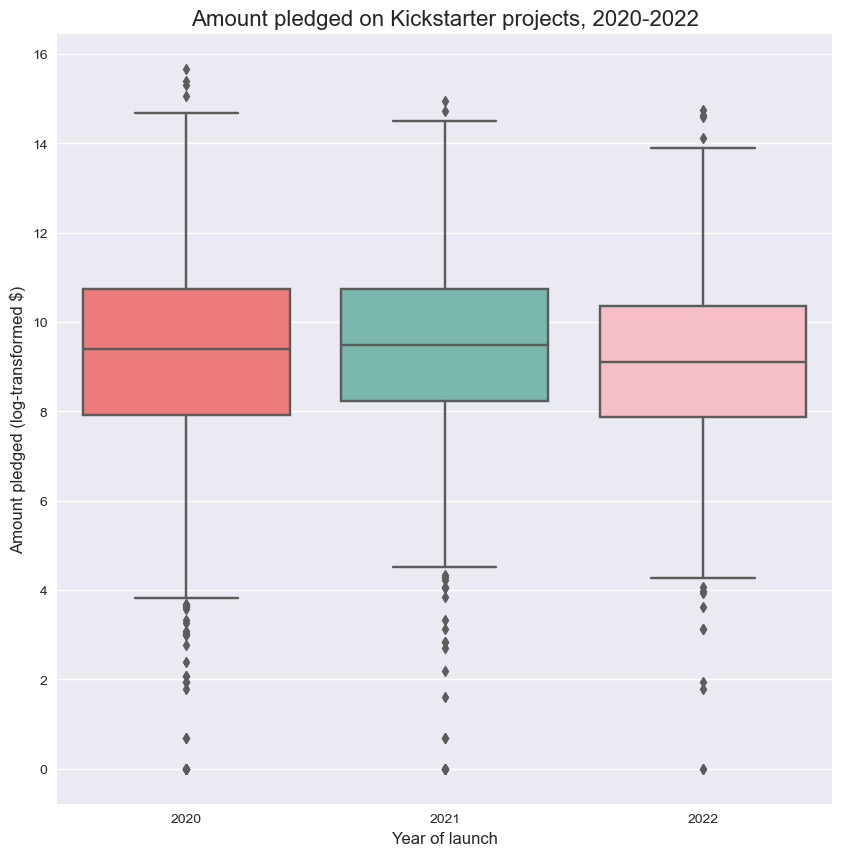

In [44]:

my_palette = ['#FF6B6B', '#70C1B3', '#FFB6C1']

# Plotting the distribution of pledged amounts each year
df['launched_at'] = pd.to_datetime(df['launched_at'])

plt.figure(figsize=(10,10))
sns.boxplot(x = df.launched_at.dt.year, y = np.log(df.converted_pledged_amount),palette=my_palette)
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Amount pledged (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Amount pledged on Kickstarter projects, 2020-2022', fontsize=16)

plt.legend()
plt.show()

/Users/sandra/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


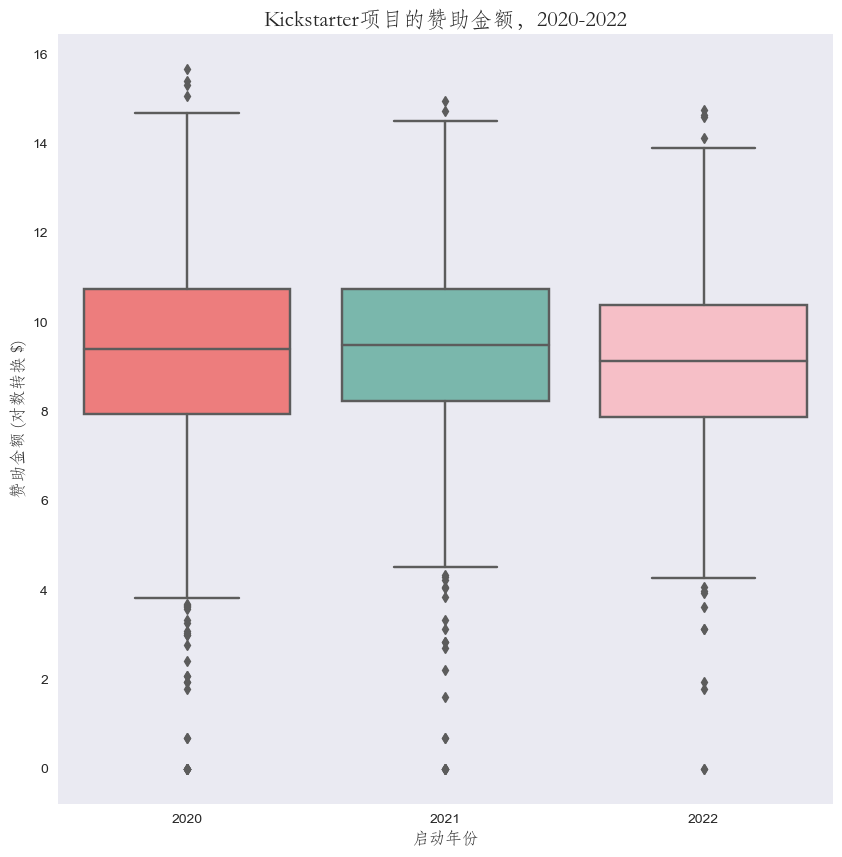

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

my_palette = ['#FF6B6B', '#70C1B3', '#FFB6C1']

# 設定字體為中文
font = FontProperties(fname='/Users/sandra/Downloads/32515377567.ttf', size = 12)

# Plotting the distribution of pledged amounts each year
df['launched_at'] = pd.to_datetime(df['launched_at'])

plt.figure(figsize=(10,10))
sns.boxplot(x=df.launched_at.dt.year, y=np.log(df.converted_pledged_amount),palette=my_palette)
plt.xlabel('启动年份', fontsize=12, fontproperties=font) # 中文標籤
plt.ylabel('赞助金额 (对数转换 $)', fontsize=12, fontproperties = font) # 中文標籤
plt.title('Kickstarter项目的赞助金额，2020-2022', {'fontsize':16, 'fontproperties':font}) # 中文標題


plt.legend()
plt.show()



/Users/sandra/anaconda3/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


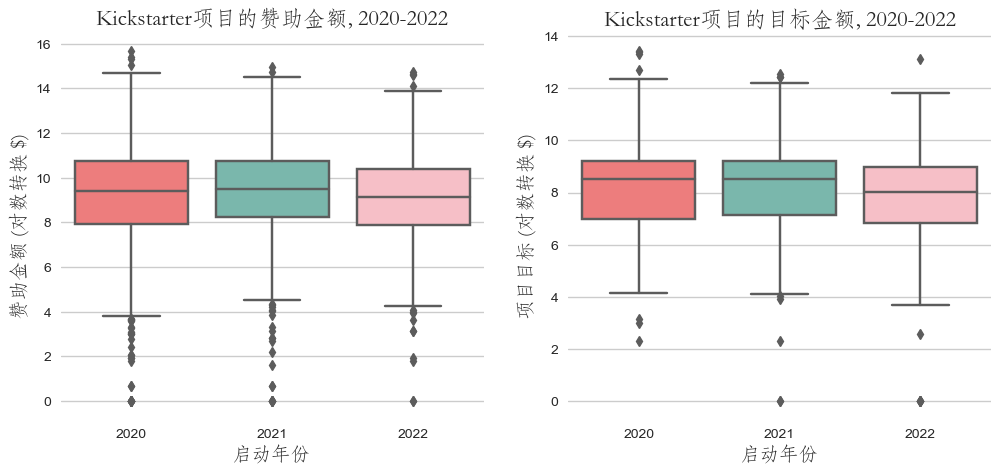

In [57]:
my_palette = ['#FF6B6B', '#70C1B3', '#FFB6C1']
df['launched_at'] = pd.to_datetime(df['launched_at'])

sns.set_style('whitegrid')

# Plotting the average amount pledged to successful and unsuccesful projects
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(12, 5))

sns.boxplot(x=df.launched_at.dt.year, y=np.log(df.converted_pledged_amount),palette=my_palette, ax=axs[0])
axs[0].set_title('Kickstarter项目的赞助金额, 2020-2022', {'fontsize' : 16, 'fontproperties' : font})
axs[0].set_xlabel('启动年份', {'fontsize' : 14, 'fontproperties' : font})
axs[0].set_ylabel('赞助金额 (对数转换 $)', {'fontsize' : 14, 'fontproperties' : font})

sns.boxplot(x = df.launched_at.dt.year, y = np.log(df.usd_goal),palette=my_palette, ax=axs[1])
axs[1].set_title('Kickstarter项目的目标金额, 2020-2022', {'fontsize' : 16, 'fontproperties' : font})
axs[1].set_xlabel('启动年份', {'fontsize' : 14, 'fontproperties' : font})
axs[1].set_ylabel('项目目标 (对数转换 $)', {'fontsize' : 14, 'fontproperties' : font})

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


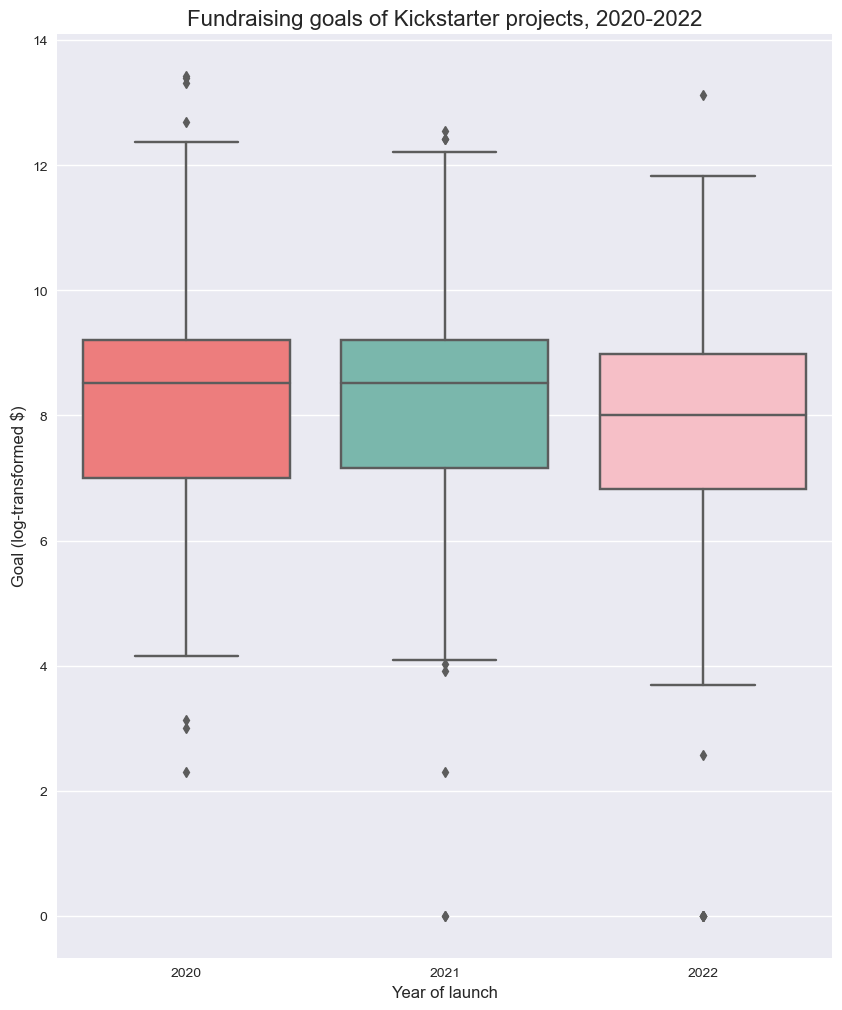

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.font_manager import FontProperties

my_palette = ['#FF6B6B', '#70C1B3', '#FFB6C1']

# Plotting the distribution of goal amounts each year
plt.figure(figsize=(10,12))
sns.boxplot(x = df.launched_at.dt.year, y = np.log(df.usd_goal),palette=my_palette)
plt.xlabel('Year of launch', fontsize=12)
plt.ylabel('Goal (log-transformed $)', fontsize=12) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Fundraising goals of Kickstarter projects, 2020-2022', fontsize = 16)

plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


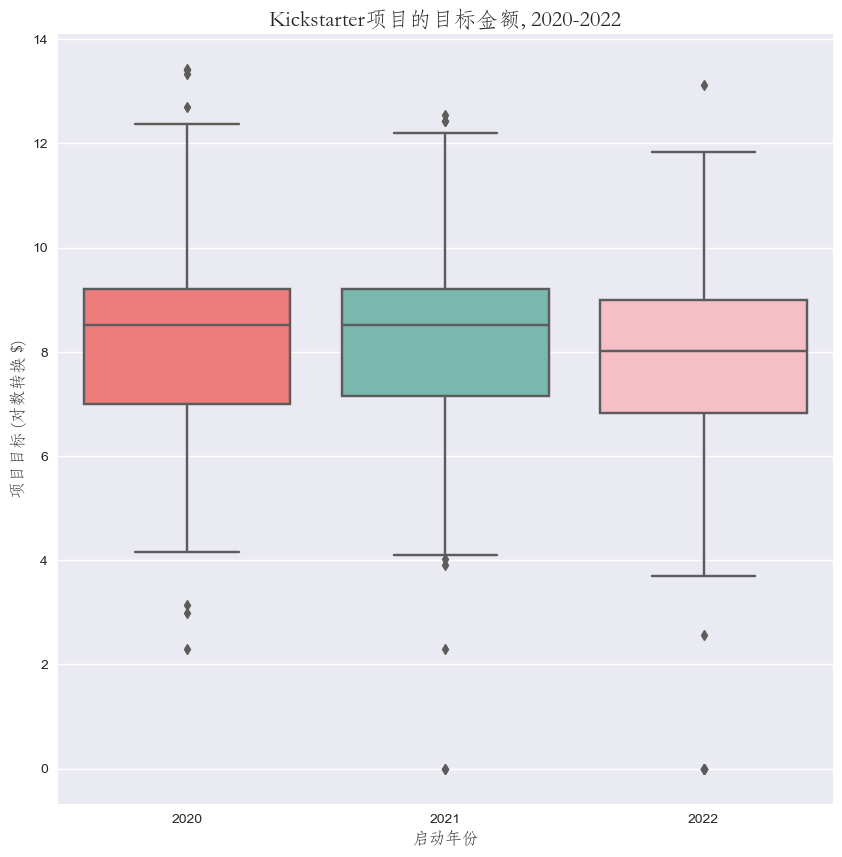

In [45]:
my_palette = ['#FF6B6B', '#70C1B3', '#FFB6C1']

# Plotting the distribution of goal amounts each year
plt.figure(figsize=(10,10))
sns.boxplot(x = df.launched_at.dt.year, y = np.log(df.usd_goal),palette=my_palette)
plt.xlabel('启动年份', fontsize = 12, fontproperties=font)
plt.ylabel('项目目标 (对数转换 $)', fontsize = 12, fontproperties=font) # Log-transforming to make the trend clearer, as the distribution is heavily positively skewed
plt.title('Kickstarter项目的目标金额, 2020-2022', {'fontsize' : 16, 'fontproperties' : font})

plt.legend()
plt.show()

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

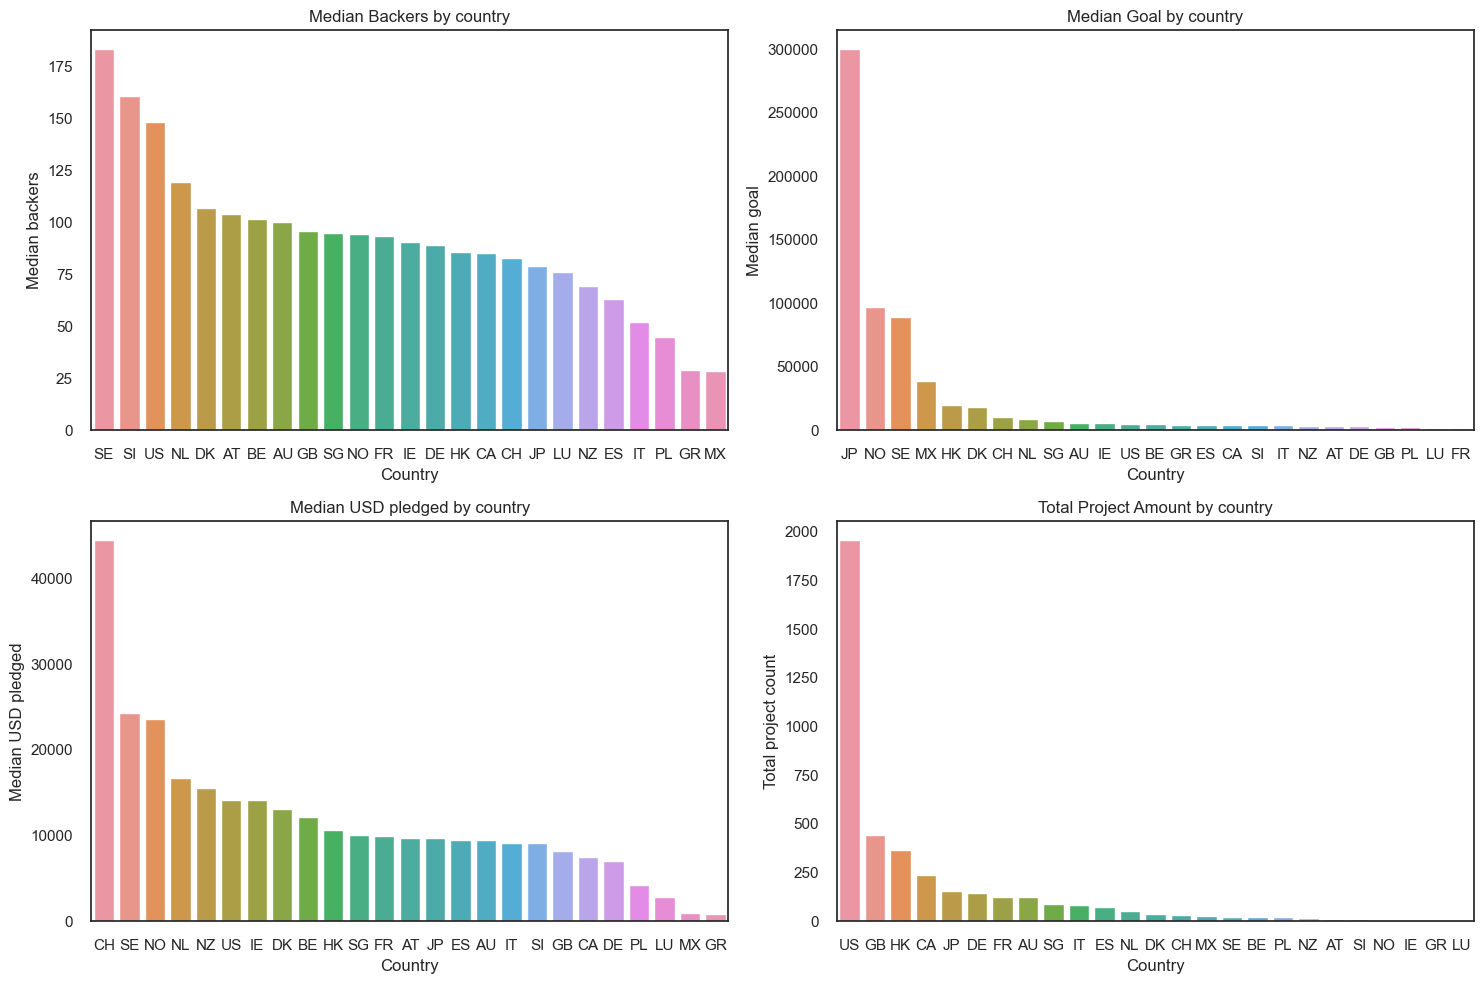

In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 計算每個國家的中位數和總項目數
country_stats = df.groupby("country").agg({
    "backers_count": "median",
    "goal": "median",
    "converted_pledged_amount": "median",
    "id": "count"
}).reset_index()

# 將國家按照每個指標的數值排序
backers_sorted = country_stats.sort_values(by="backers_count", ascending=False)
goal_sorted = country_stats.sort_values(by="goal", ascending=False)
usd_pledged_sorted = country_stats.sort_values(by="converted_pledged_amount", ascending=False)
project_count_sorted = country_stats.sort_values(by="id", ascending=False)

# 繪製多子圖中的長條圖
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

sns.barplot(x="country", y="backers_count", data=backers_sorted, ax=axs[0][0])
sns.barplot(x="country", y="goal", data=goal_sorted, ax=axs[0][1])
sns.barplot(x="country", y="converted_pledged_amount", data=usd_pledged_sorted, ax=axs[1][0])
sns.barplot(x="country", y="id", data=project_count_sorted, ax=axs[1][1])

# 設置標題和軸標籤
axs[0][0].set(title="Median Backers by country", xlabel="Country", ylabel="Median backers")
axs[0][1].set(title="Median Goal by country", xlabel="Country", ylabel="Median goal")
axs[1][0].set(title="Median USD pledged by country", xlabel="Country", ylabel="Median USD pledged")
axs[1][1].set(title="Total Project Amount by country", xlabel="Country", ylabel="Total project count")

# 調整x軸標籤角度
for ax in axs.flat:
    plt.setp(ax.get_xticklabels())

plt.tight_layout()
plt.show()

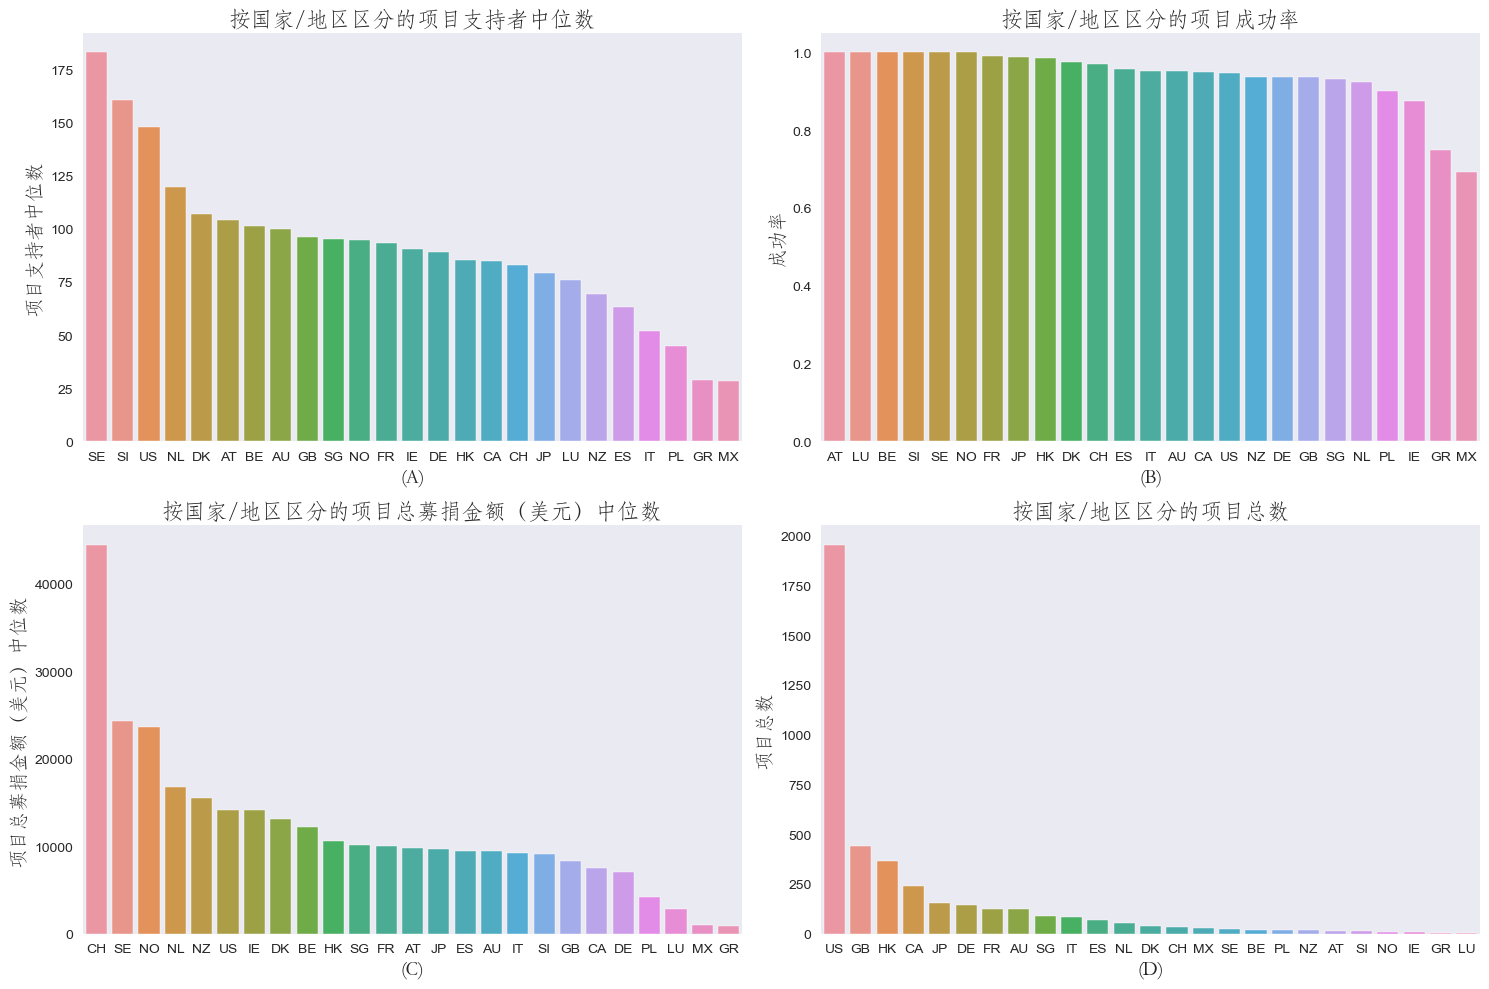

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 計算每個國家的中位數和總項目數
country_stats = df.groupby("country").agg({
    "backers_count": "median",
    "converted_pledged_amount": "median",
    "id": "count"
}).reset_index()

# 將國家按照每個指標的數值排序
backers_sorted = country_stats.sort_values(by = "backers_count", ascending = False)

# 計算每個國家的項目成功率
success_rate = df[df["state"] == "successful"].groupby("country")["state"].count() / df.groupby("country")["state"].count()
success_rate = success_rate.reset_index(name="成功率")
success_rate_sorted = success_rate.sort_values(by="成功率", ascending=False)

usd_pledged_sorted = country_stats.sort_values(by = "converted_pledged_amount", ascending = False)
project_count_sorted = country_stats.sort_values(by = "id", ascending = False)

# 繪製多子圖中的長條圖
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(15, 10))

sns.barplot(x="country", y="backers_count", data=backers_sorted, ax=axs[0][0])
sns.barplot(x="country", y="成功率", data=success_rate_sorted, ax=axs[0][1])
sns.barplot(x="country", y="converted_pledged_amount", data=usd_pledged_sorted, ax=axs[1][0])
sns.barplot(x="country", y="id", data=project_count_sorted, ax=axs[1][1])

# 設置標題和軸標籤

axs[0][0].set_xlabel("(A)", {'fontsize' : 14, 'fontproperties': font})
axs[0][0].set_ylabel("项目支持者中位数", {'fontsize' : 14, 'fontproperties': font})
axs[0][0].set_title("按国家/地区区分的项目支持者中位数", {'fontsize' : 16, 'fontproperties': font})

axs[0][1].set_xlabel("(B)", {'fontsize' : 14, 'fontproperties': font})
axs[0][1].set_ylabel("成功率", {'fontsize' : 14, 'fontproperties': font})
axs[0][1].set_title("按国家/地区区分的项目成功率", {'fontsize' : 16, 'fontproperties': font})

axs[1][0].set_xlabel("(C)", {'fontsize' : 14, 'fontproperties': font})
axs[1][0].set_ylabel("项目总募捐金额（美元）中位数", {'fontsize' : 14, 'fontproperties': font})
axs[1][0].set_title("按国家/地区区分的项目总募捐金额（美元）中位数", {'fontsize' : 16, 'fontproperties': font})

axs[1][1].set_xlabel("(D)", {'fontsize' : 14, 'fontproperties': font})
axs[1][1].set_ylabel("项目总数", {'fontsize' : 14, 'fontproperties': font})
axs[1][1].set_title("按国家/地区区分的项目总数", {'fontsize' : 16, 'fontproperties': font})

plt.tight_layout()
plt.show()


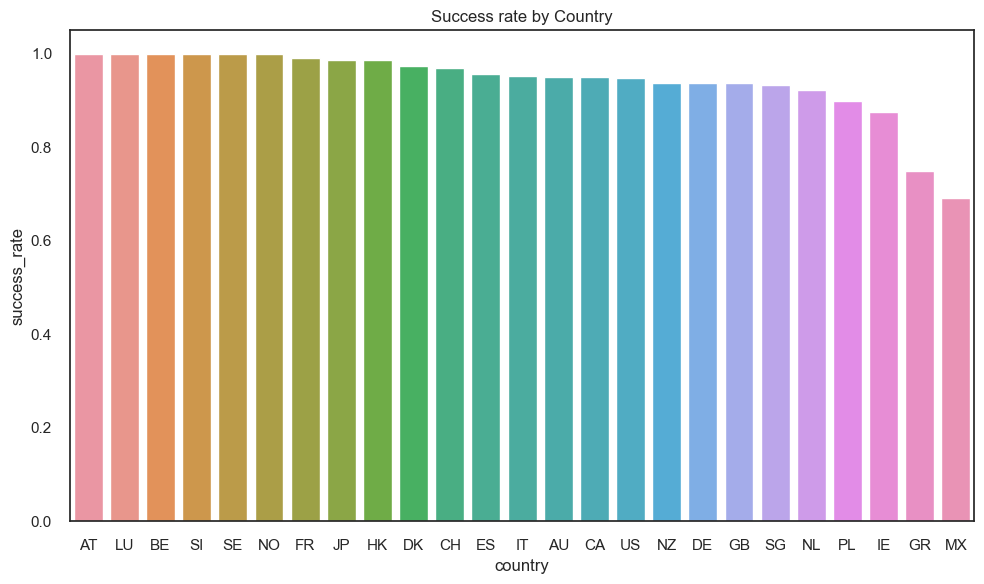

In [116]:
# 計算每個國家的項目成功率
success_rate = df[df["state"] == "successful"].groupby("country")["state"].count() / df.groupby("country")["state"].count()
success_rate = success_rate.reset_index(name = "success_rate")

success_rate_sorted = success_rate.sort_values(by = "success_rate", ascending = False)

# 創建一個子圖
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x = "country", y = "success_rate", data=success_rate_sorted)
ax.set_title("Success rate by Country")

plt.tight_layout()
plt.show()

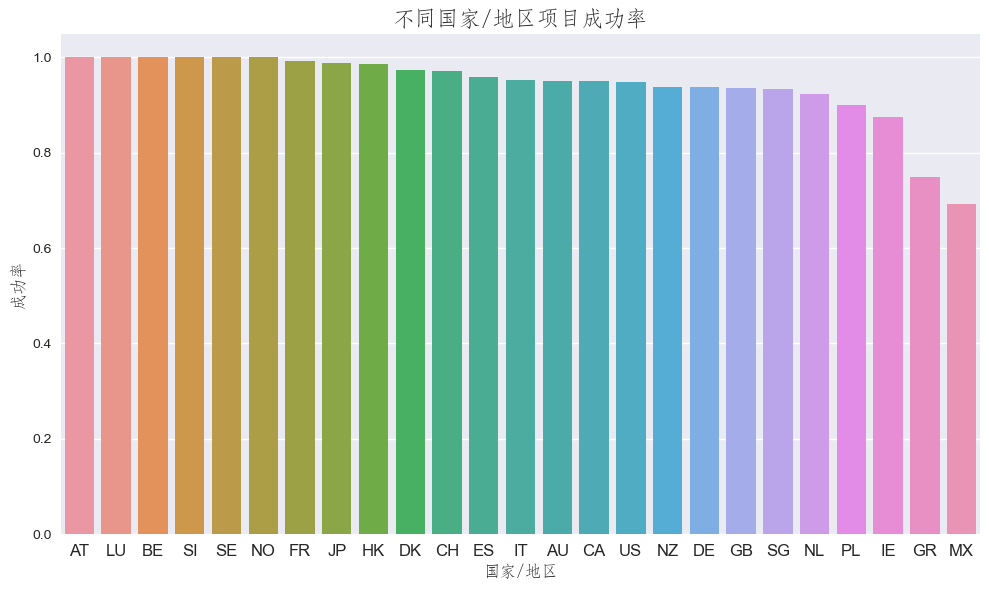

In [40]:
# 計算每個國家的項目成功率
success_rate = df[df["state"] == "successful"].groupby("country")["state"].count() / df.groupby("country")["state"].count()
success_rate = success_rate.reset_index(name="成功率")

success_rate_sorted = success_rate.sort_values(by="成功率", ascending=False)

# 創建一個子圖
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(x="country", y="成功率", data=success_rate_sorted)
ax.set_title("不同国家/地区项目成功率", {'fontsize' : 16, 'fontproperties' : font})

# 設置 x 軸標籤的字體大小及旋轉角度
ax.tick_params(axis='x', labelsize=12)

# 設置 x 軸標籤的名稱
ax.set_xlabel("国家/地区", {'fontsize' : 12, 'fontproperties' : font})

# 設置 y 軸標籤的名稱
ax.set_ylabel("成功率", {'fontsize' : 12, 'fontproperties' : font})

plt.tight_layout()
plt.show()


In [70]:
print("Average fundraising goal per project in each year, in $:")
print(round(df.set_index('launched_at').usd_goal.resample('YS').mean(),2))


Average fundraising goal per project in each year, in $:
launched_at
2020-01-01    11513.74
2021-01-01     9685.54
2022-01-01     7296.78
Freq: AS-JAN, Name: usd_goal, dtype: float64


### 检查分布情况
除了blurb_length之外，大多数连续数字特征都是严重的正偏态。这对一些机器学习模型来说不是问题，所以这些特征在最初的几个模型中不会被对数转换。之后，模型将使用对数转换后的数据进行ru-run，以观察这是否能提高模型的准确性。

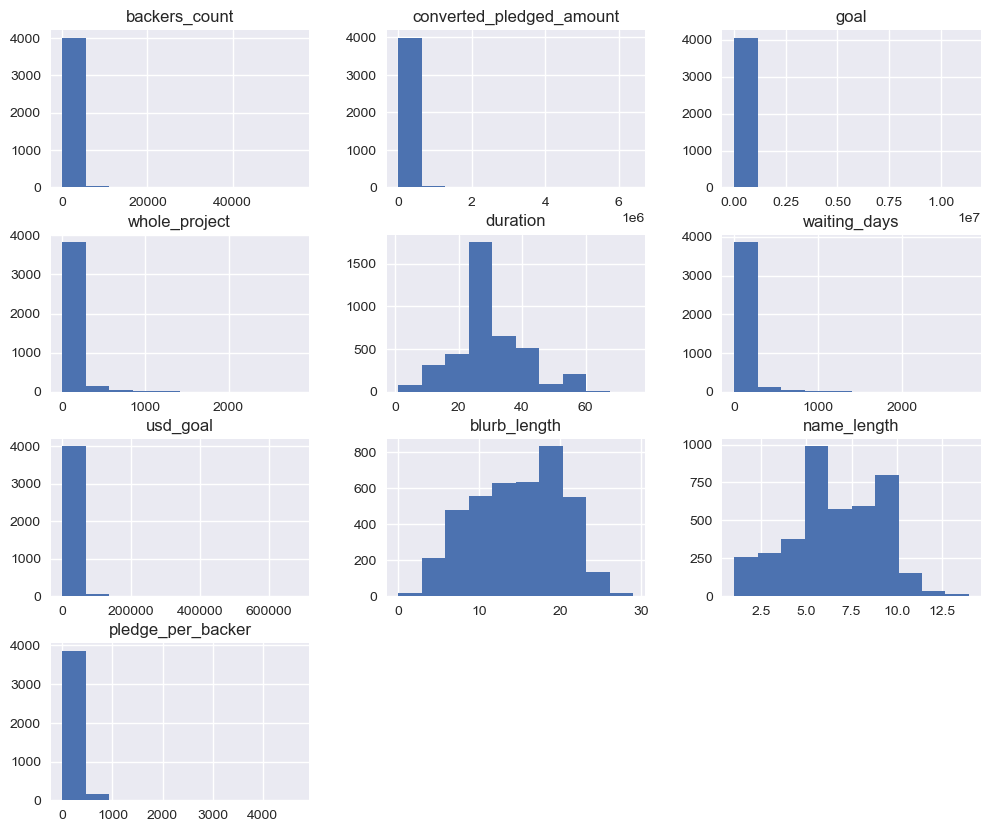

In [90]:
# Checking the distributions of continuous features
df[df.describe().columns].hist(figsize=(12,10));

/var/folders/yn/bx412gns07g22zp4wvy8hf540000gn/T/ipykernel_3312/2694168632.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()
/var/folders/yn/bx412gns07g22zp4wvy8hf540000gn/T/ipykernel_3312/2694168632.py:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


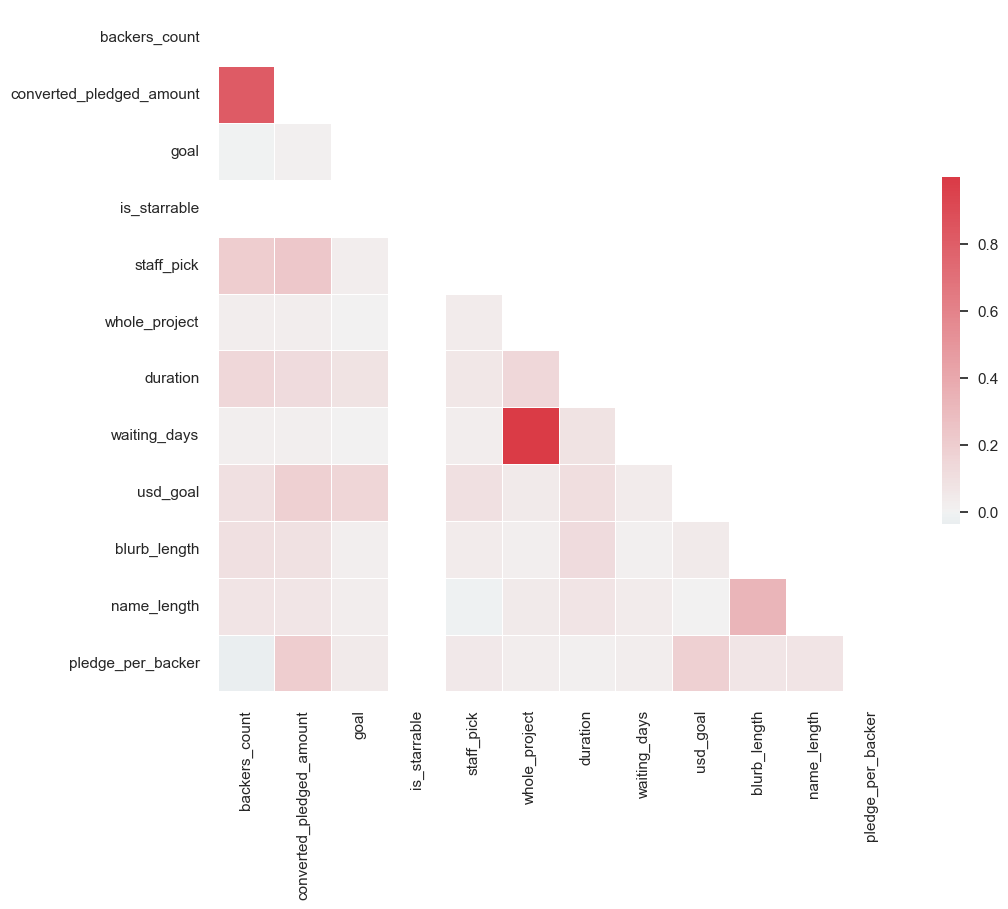

In [89]:
# Set the style of the visualization
sns.set(style="white")

# 設定自定義顏色
cmap = sns.diverging_palette(220, 10, as_cmap = True)

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize = (11,9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5});


## 信息增益

In [9]:
df = pd.read_csv('df_20_22_success_d.csv')
df.shape

(4063, 16)

### state轉換（成功为1，失败为0）

In [10]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

### 將字串特徵轉換為整數

In [11]:
from sklearn.preprocessing import LabelEncoder

# 將字串特徵轉換為整數
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])


# 檢查資料
print(df.head())

   backers_count  converted_pledged_amount  country  disable_communication  \
0              6                       576       24                  False   
1           5224                    849314       24                  False   
2              8                       137       24                  False   
3             50                      4843       14                  False   
4             13                       214        9                  False   

     goal          id  is_starrable  staff_pick  state  whole_project  \
0    1500    48492531         False       False      0             46   
1   25000  1975483165         False        True      1            106   
2   10000   176385138         False       False      0             43   
3  100000   429678046         False       False      1            138   
4      75  2022852820         False       False      1             10   

   duration  waiting_days  usd_goal  blurb_length  name_length  \
0        15            31 

### one-hot encoded

In [12]:
# Converting boolean features to string to include them in one-hot encoding
df['staff_pick'] = df['staff_pick'].astype(str)

In [13]:
# Creating dummy variables
df = pd.get_dummies(df)

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# 將目標特徵和特徵變量分開
X = df.drop('state', axis=1)
y = df['state']

# 計算每個特徵的信息增益
mi = mutual_info_classif(X, y)

# 將結果保存到一個DataFrame中
results = pd.DataFrame({'feature': X.columns, 'mutual_info': mi})

# 根據信息增益對特徵進行排序
results = results.sort_values(by='mutual_info', ascending=False)

# 打印排序後的結果
print(results)


                     feature  mutual_info
10                  usd_goal     0.012528
12               name_length     0.010790
14          staff_pick_False     0.009854
0              backers_count     0.009264
13         per_backer_pledge     0.004352
8                   duration     0.004064
2                    country     0.003875
15           staff_pick_True     0.003774
4                       goal     0.002466
1   converted_pledged_amount     0.002167
5                         id     0.002050
9               waiting_days     0.000813
11              blurb_length     0.000491
6               is_starrable     0.000228
7              whole_project     0.000102
3      disable_communication     0.000000


In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# 將目標特徵和特徵變量分開
X = df.drop('state', axis=1)
y = df['state']

# 計算每個特徵的信息增益
mi = mutual_info_classif(X, y)

# 將結果保存到一個DataFrame中
results = pd.DataFrame({'feature': X.columns, 'mutual_info': mi})

# 根據信息增益對特徵進行排序
results = results.sort_values(by='mutual_info', ascending=False)

# 打印排序後的結果
print(results)

                     feature  mutual_info
12               name_length     0.011407
10                  usd_goal     0.008300
9               waiting_days     0.007169
15           staff_pick_True     0.006132
6               is_starrable     0.005171
13         per_backer_pledge     0.005015
8                   duration     0.004722
1   converted_pledged_amount     0.002937
0              backers_count     0.002891
11              blurb_length     0.002738
2                    country     0.002501
7              whole_project     0.001741
4                       goal     0.001030
14          staff_pick_False     0.000736
3      disable_communication     0.000000
5                         id     0.000000


### 刪除掉不需要的部分

In [174]:
# 刪除指定列
df = df.drop(['deadline', 'launched_at', 'backers_count', 'converted_pledged_amount', 'disable_communication', 'goal', 'is_starrable', 'static_usd_rate', 'created'], axis=1, inplace=False)
df.head()

,country,id,staff_pick,state,whole_project,duration,waiting_days,usd_goal,blurb_length,name_length
0,24,48492531,False,0,46,15,31,1500,12,5
1,24,1975483165,True,1,106,50,56,25000,18,11
2,24,176385138,False,0,43,30,13,10000,23,2
3,14,429678046,False,1,138,35,103,682,20,10
4,9,2022852820,False,1,10,7,3,93,4,6


In [14]:
# 儲存修改後的 DataFrame
df.to_csv('df_20_22_clear.csv', index = False)

# 決策樹

In [3]:
df = pd.read_csv('df_20_22_clear.csv')

In [4]:
df['state'] = df['state'].replace({'failed': 0, 'successful': 1})

In [5]:
from sklearn.preprocessing import LabelEncoder

# 將字串特徵轉換為整數
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])


# 檢查資料
print(df.head())

   country    goal          id  is_starrable  staff_pick  state  \
0       24    1500    48492531         False       False      0   
1       24   25000  1975483165         False        True      1   
2       24   10000   176385138         False       False      0   
3       14  100000   429678046         False       False      1   
4        9      75  2022852820         False       False      1   

   whole_project  duration  waiting_days  usd_goal  blurb_length  name_length  \
0             46        15            31      1500            12            5   
1            106        50            56     25000            18           11   
2             43        30            13     10000            23            2   
3            138        35           103       682            20           10   
4             10         7             3        93             4            6   

   per_backer_pledge  
0                 96  
1                163  
2                 17  
3                 

In [6]:
# Converting boolean features to string to include them in one-hot encoding
df['staff_pick'] = df['staff_pick'].astype(str)

In [7]:
# Creating dummy variables
df = pd.get_dummies(df)

最后，因果（y）和独立（X）特征将被分离成独立的数据集。由于这些特征的尺度不同，独立特征将使用StandardScaler进行转换和归一化。

In [8]:
X_unscaled = df.drop('state', axis=1)
y = df.state

In [9]:
# Transforming the data
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X_unscaled), columns=list(X_unscaled.columns))
X.head()

,country,goal,id,is_starrable,whole_project,duration,waiting_days,usd_goal,blurb_length,name_length,per_backer_pledge,staff_pick_False,staff_pick_True
0,0.921816,-0.136916,-1.670450,0.0,-0.389282,-1.443865,-0.290237,-0.313071,-0.483941,-0.627764,-0.233579,0.412984,-0.412984
1,0.921816,-0.029722,1.447330,0.0,-0.010095,1.705434,-0.130944,0.584823,0.574892,1.755236,0.102557,-2.421400,2.421400
2,0.921816,-0.098144,-1.463526,0.0,-0.408241,-0.094166,-0.404928,0.011699,1.457252,-1.819264,-0.629917,0.412984,-0.412984
3,-0.289758,0.312387,-1.053710,0.0,0.192138,0.355734,0.168527,-0.344325,0.927836,1.358070,-0.228562,0.412984,-0.412984
4,-0.895545,-0.143416,1.523972,0.0,-0.616794,-2.163705,-0.468645,-0.366830,-1.895718,-0.230597,-0.634934,0.412984,-0.412984


# 超參數調整

## 隨機搜索

In [153]:
from random import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {"max_depth": [3, 4, 5, None],
              "min_samples_split": [2, 5, 10],
              "min_samples_leaf": [1, 5, 10],
              "max_features": [None, "sqrt", "log2"],
              "criterion": ["gini", "entropy"]}

### 定義模型和隨機搜索對象

In [154]:
dtc = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dtc, param_distributions=param_dist, n_iter=100, cv=5, random_state=42)

### 訓練模型

In [155]:
random_search.fit(X, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 4, 5, None],
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42)

### 查看最佳超參數組合和模型表現

In [156]:
print('Best parameters: ', random_search.best_params_)
print('Best score: ', random_search.best_score_)

Best parameters:  {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'criterion': 'entropy'}
Best score:  0.9660359066644855


### 以隨機搜索給出的超參數組合建立決策樹

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [75]:
# 拆分數據集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 將最佳超參數存儲為變量
best_params = {'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 4, 'criterion': 'entropy'}


# 使用最佳超參數建立決策樹模型
dtc = DecisionTreeClassifier(**best_params, random_state=42)
dtc.fit(X_train, y_train)

# 預測訓練集和測試集的結果
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# 計算混淆矩陣
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# 計算準確度、精確度、召回率和F1值
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, pos_label=1)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)

train_recall = recall_score(y_train, y_train_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# 輸出結果
print("訓練集的混淆矩陣：")
print(train_cm)
print("測試集的混淆矩陣：")
print(test_cm)
print("訓練集的準確度：", train_acc)
print("測試集的準確度：", test_acc)
print("訓練集的精確度：", train_precision)
print("測試集的精確度：", test_precision)
print("訓練集的召回率：", train_recall)
print("測試集的召回率：", test_recall)
print("訓練集的F1值：", train_f1)
print("測試集的F1值：", test_f1)

訓練集的混淆矩陣：
[[  59  103]
 [   7 3081]]
測試集的混淆矩陣：
[[ 15  20]
 [  5 773]]
訓練集的準確度： 0.9661538461538461
測試集的準確度： 0.9692496924969249
訓練集的精確度： 0.9676507537688442
測試集的精確度： 0.9747793190416141
訓練集的召回率： 0.9977331606217616
測試集的召回率： 0.993573264781491
訓練集的F1值： 0.9824617346938774
測試集的F1值： 0.9840865690642902


### 繪製混淆矩陣

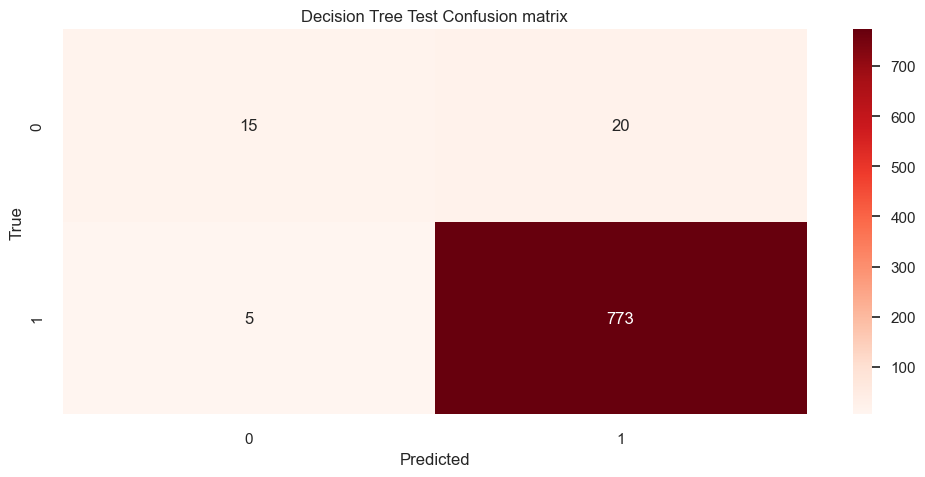

In [141]:
plt.title('Decision Tree Test Confusion matrix')
sns.heatmap(test_cm, annot = True, cmap = 'Reds', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

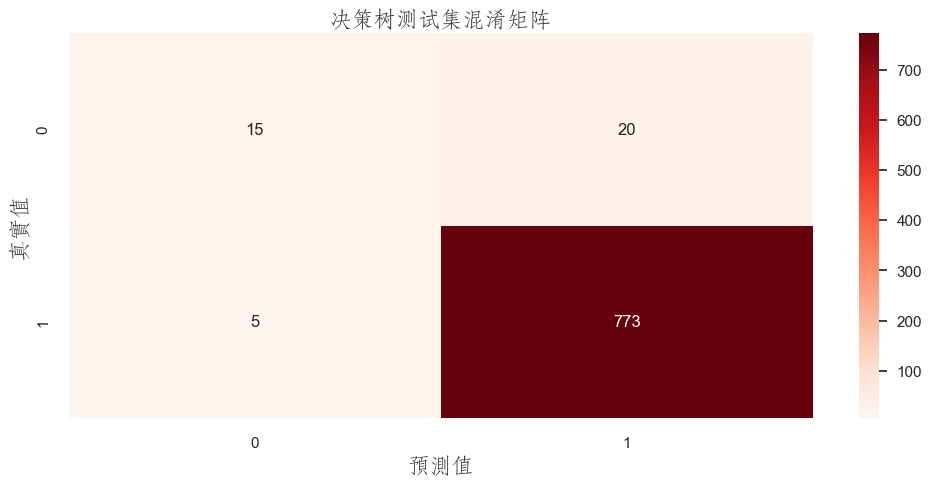

In [142]:
# 設定字體為中文
font = FontProperties(fname='/Users/sandra/Downloads/32515377567.ttf')
# 繪製混淆矩陣
plt.title('决策树测试集混淆矩阵', {'fontsize' : 16, 'fontproperties' : font})
sns.heatmap(test_cm, annot = True, cmap = 'Reds', fmt = 'g')
plt.xlabel('預測值', {'fontsize' : 16, 'fontproperties' : font})
plt.ylabel('真實值', {'fontsize' : 16, 'fontproperties' : font})
plt.show()

### 特征重要性分析

In [12]:
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))

1. feature 10 (0.703324): per_backer_pledge
2. feature 7 (0.123194): usd_goal
3. feature 6 (0.076855): waiting_days
4. feature 1 (0.049194): goal
5. feature 4 (0.039818): whole_project
6. feature 9 (0.007615): name_length
7. feature 12 (0.000000): staff_pick_True
8. feature 11 (0.000000): staff_pick_False
9. feature 8 (0.000000): blurb_length
10. feature 5 (0.000000): duration
11. feature 3 (0.000000): is_starrable
12. feature 2 (0.000000): id
13. feature 0 (0.000000): country


### 特征相关性矩阵

In [62]:
from scipy.stats import pearsonr

# 計算每個特徵和目標特徵的皮爾斯相關係數
correlations = []
for feature in X_train.columns:
    corr, _ = pearsonr(X_train[feature], y_train)
    correlations.append(corr)

/Users/sandra/anaconda3/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


In [63]:
import pandas as pd

# 將相關性轉換為數據框
correlations_df = pd.DataFrame({'Feature': X_train.columns, 'Correlation': correlations})

# 按相關性排序
correlations_df = correlations_df.sort_values('Correlation', ascending=False)

# 輸出相關性結果
print(correlations_df)

              Feature  Correlation
9         name_length     0.137842
10  per_backer_pledge     0.100584
12    staff_pick_True     0.081219
6        waiting_days     0.060640
4       whole_project     0.058915
8        blurb_length     0.051828
2                  id    -0.007140
0             country    -0.011523
5            duration    -0.015210
11   staff_pick_False    -0.081219
1                goal    -0.086275
7            usd_goal    -0.206930
3        is_starrable          NaN


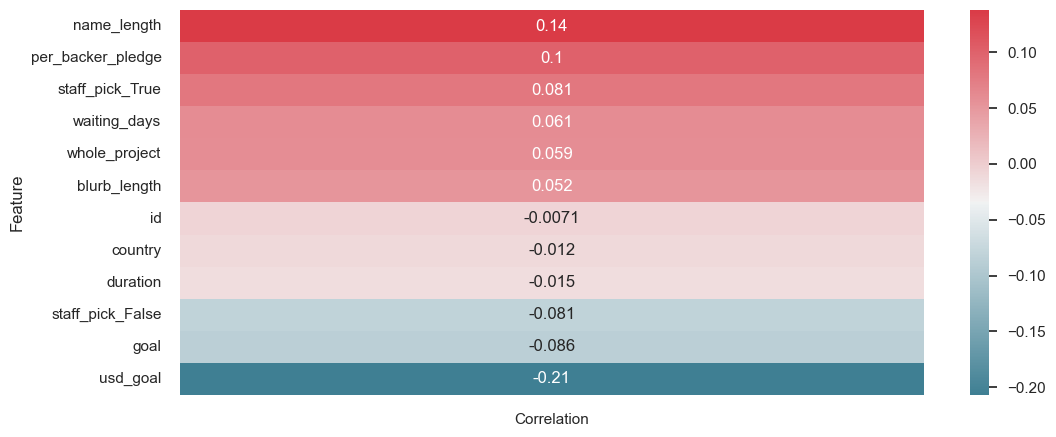

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style of the visualization
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# 創建一個範例 DataFrame
df = pd.DataFrame({
    'Feature': ['name_length', 'per_backer_pledge', 'staff_pick_True', 'waiting_days', 'whole_project', 'blurb_length'
               , 'id', 'country', 'duration', 'staff_pick_False', 'goal', 'usd_goal'],
    'Correlation': [0.137842, 0.100584, 0.081219, 0.060640, 0.058915, 0.051828, -0.007140, -0.011523, -0.015210, -0.081219
                   , -0.086275, -0.206930]
})

# 將 Feature 設置為索引
df = df.set_index('Feature')

# 繪製熱力圖
sns.heatmap(df, annot=True, cmap=cmap)
plt.show()


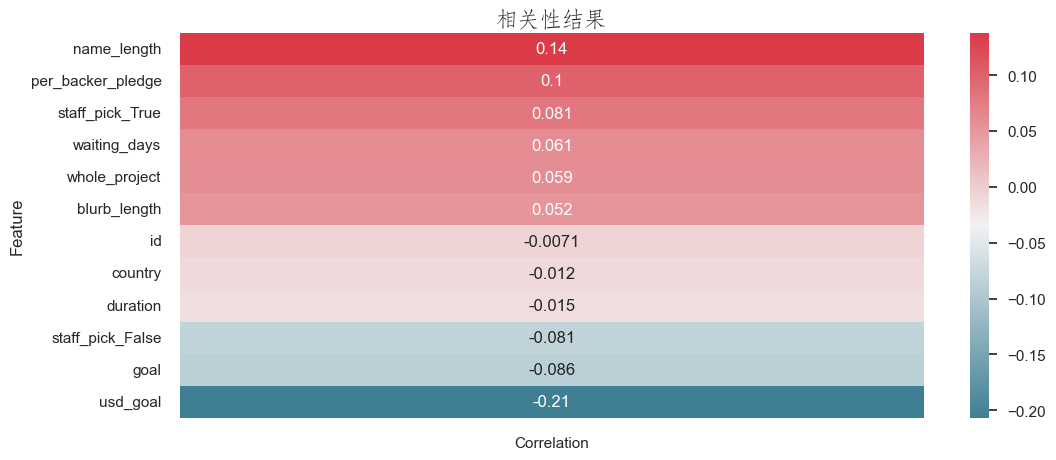

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Set the style of the visualization
sns.set(style="white")

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)


# 創建一個範例 DataFrame
df = pd.DataFrame({
    'Feature': ['name_length', 'per_backer_pledge', 'staff_pick_True', 'waiting_days', 'whole_project', 'blurb_length'
               , 'id', 'country', 'duration', 'staff_pick_False', 'goal', 'usd_goal'],
    'Correlation': [0.137842, 0.100584, 0.081219, 0.060640, 0.058915, 0.051828, -0.007140, -0.011523, -0.015210, -0.081219
                   , -0.086275, -0.206930]
})

# 將 Feature 設置為索引
df = df.set_index('Feature')

# 繪製熱力圖
sns.heatmap(df, annot=True, cmap=cmap)
plt.title('相关性结果', {'fontsize' : 16, 'fontproperties' : font})
plt.show()

In [222]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import pearsonr

# 获取每个叶子节点中的样本
leaf_samples = dtc.apply(X)

# 定义函数，用于计算节点中样本所包含的变量之间的相关系数
def leaf_corr(X):
    corr_matrix = np.zeros((X.shape[1], X.shape[1]))
    for i in range(X.shape[1]):
        for j in range(i+1, X.shape[1]):
            corr, _ = pearsonr(X[:, i], X[:, j])
            corr_matrix[i, j] = corr
            corr_matrix[j, i] = corr
    return corr_matrix

# 计算每个叶子节点中样本所包含的变量之间的相关系数
corr_dict = {}
for leaf in np.unique(leaf_samples):
    leaf_X = pd.DataFrame(X.iloc[np.where(leaf_samples == leaf)[0]], columns=X.columns)
    corr_matrix = leaf_corr(leaf_X.values)
    corr_dict[leaf] = corr_matrix
    print(f"Leaf {leaf}:")
    print(corr_matrix)


Leaf 3:
[[ 0.         -0.1740572   0.05859056         nan  0.249312   -0.24716106
   0.25362077  0.03006788 -0.28419211  0.09700699  0.0545388  -0.22488793
   0.22488793]
 [-0.1740572   0.          0.46723961         nan -0.34311341  0.55682316
  -0.35911303  0.75626236  0.11197772  0.54668105  0.04807839  0.33212893
  -0.33212893]
 [ 0.05859056  0.46723961  0.                 nan -0.01240192 -0.13632668
  -0.00570908  0.26552054  0.0944778   0.36962538 -0.22148504  0.616285
  -0.616285  ]
 [        nan         nan         nan  0.                 nan         nan
          nan         nan         nan         nan         nan         nan
          nan]
 [ 0.249312   -0.34311341 -0.01240192         nan  0.         -0.60475854
   0.99931478 -0.27425348 -0.2866955   0.11500446  0.06536159  0.13356198
  -0.13356198]
 [-0.24716106  0.55682316 -0.13632668         nan -0.60475854  0.
  -0.63382166  0.53307378 -0.10204492 -0.05186987  0.06749938 -0.16829213
   0.16829213]
 [ 0.25362077 -0.3591130

An input array is constant; the correlation coefficient is not defined.


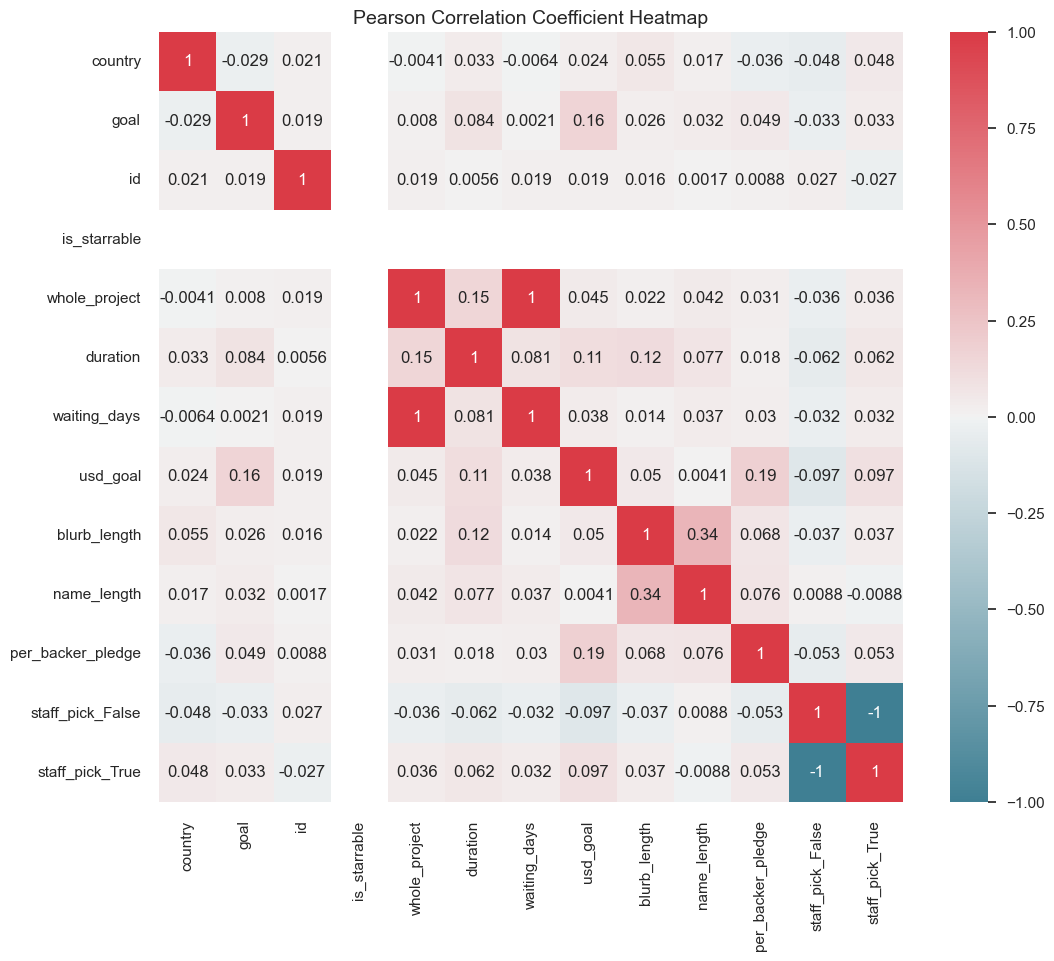

In [83]:
# 使用Pearson相关系数计算特征之间的相关性
correlation_matrix = X.corr()

# 将相关系数矩阵可视化成热图
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = cmap)
plt.title('Pearson Correlation Coefficient Heatmap', fontsize = 14)
plt.show()

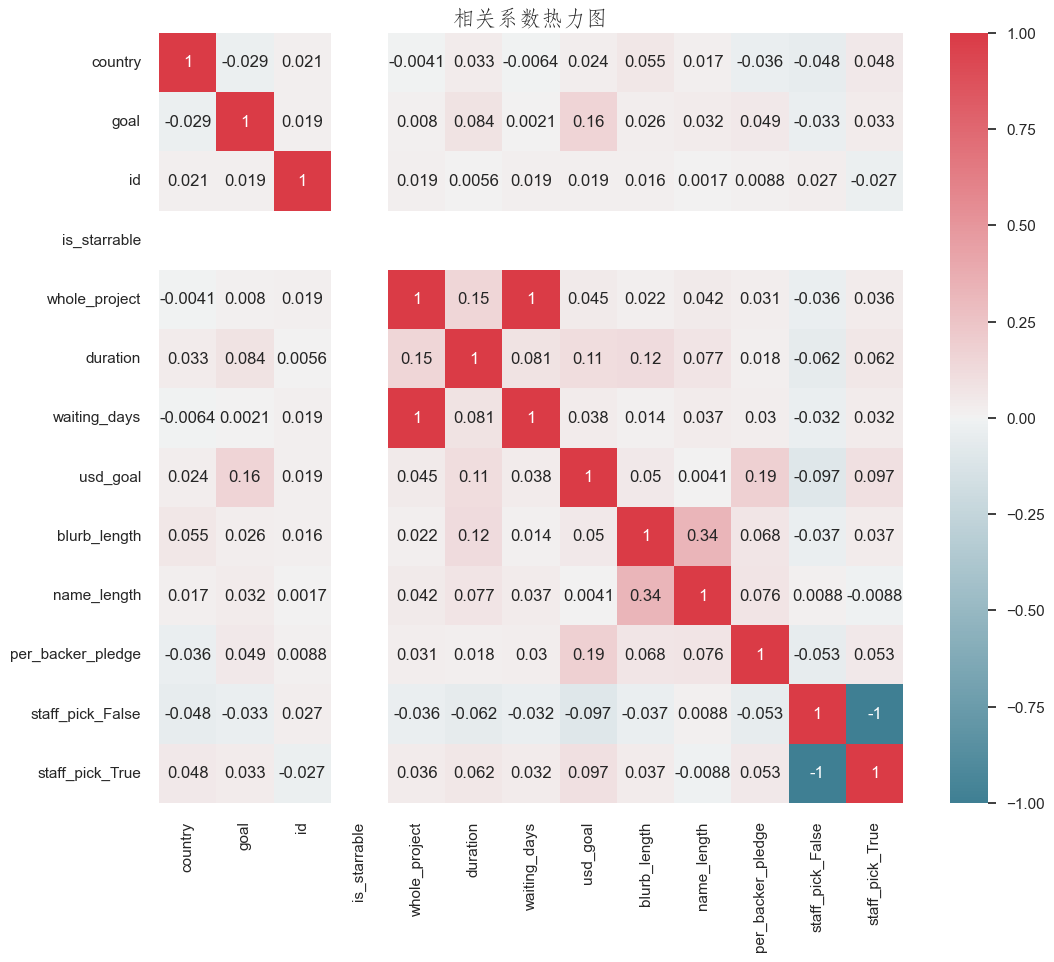

In [84]:
# 将特征重要性与特征名称组合成数据框
importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# 使用Pearson相关系数计算特征之间的相关性
correlation_matrix = X.corr()

# 将相关系数矩阵可视化成热图
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot = True, cmap = cmap)
plt.title('相关系数热力图', {'fontsize' : 16, 'fontproperties' : font})
plt.show()

### 局部解释性分析

In [13]:
import shap
import pandas as pd

# 创建shap解释器对象
explainer = shap.TreeExplainer(dtc)

# 计算样本shap值
shap_values = explainer.shap_values(X)

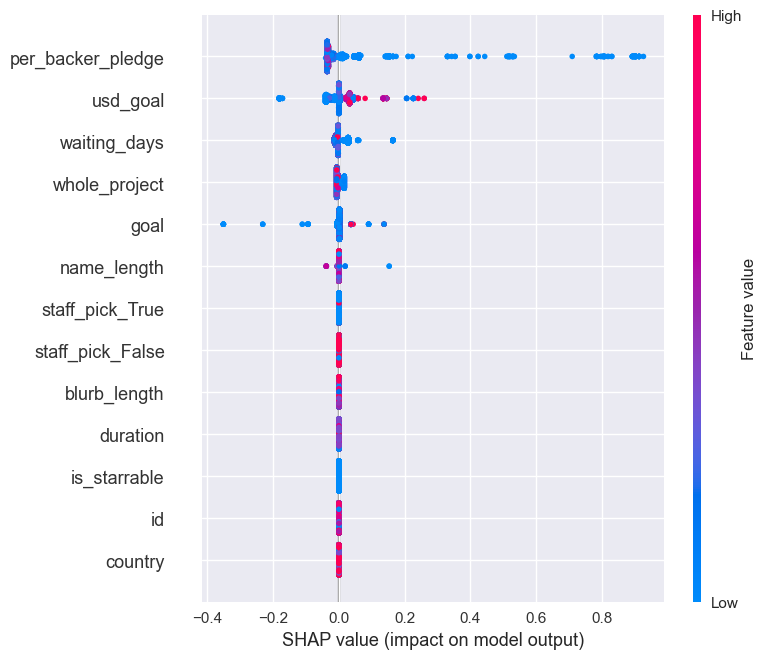

In [27]:
# 可视化所有样本的shap值
shap.summary_plot(shap_values[0], X)

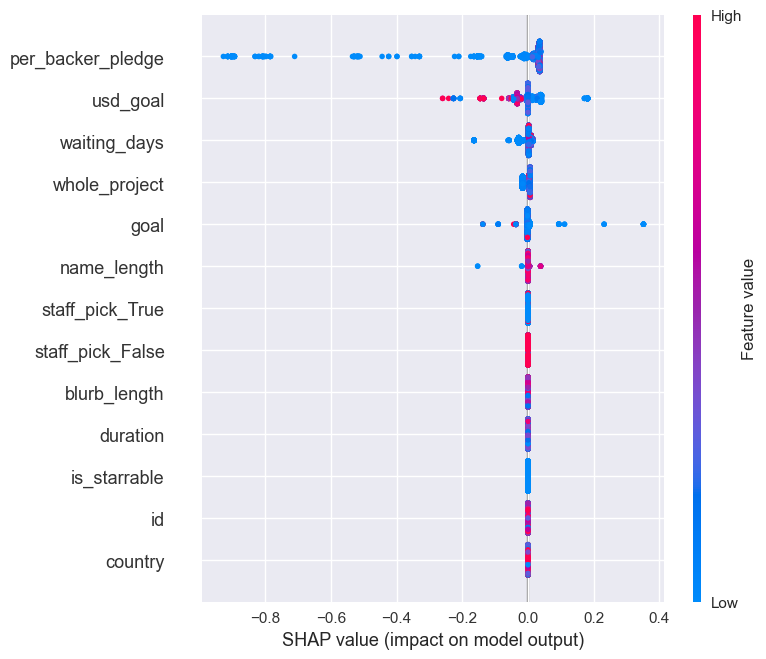

In [26]:
# 可视化所有样本的shap值
shap.summary_plot(shap_values[1], X)

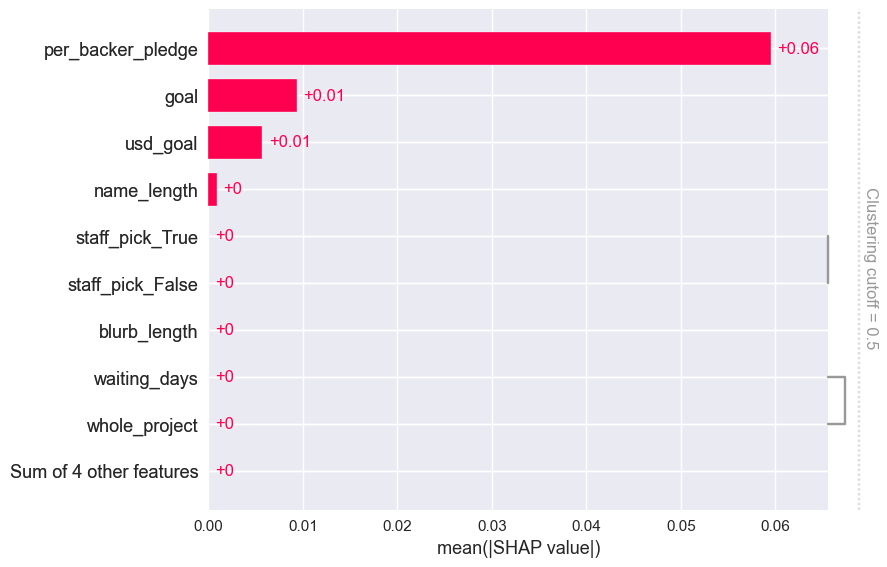

In [18]:
shap.plots.bar(shap_values_partition)

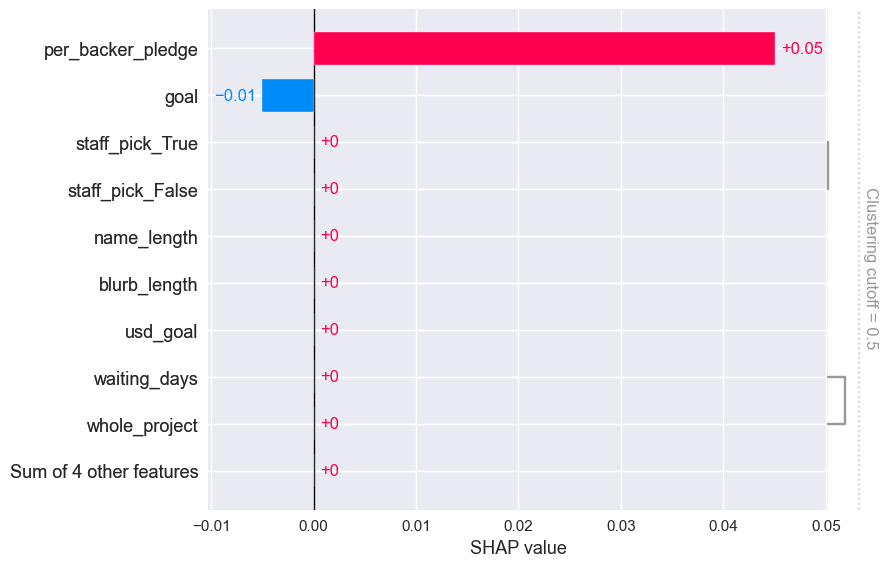

In [23]:
shap.plots.bar(shap_values_partition[0])

## vanilla logistic regression

In [10]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [11]:
# Fitting a logistic regression model with default parameters
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [12]:
# Making predictions
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [13]:
# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))
print("\nClassification report:")
print(classification_report(y_test, y_hat_test))

Logistic regression score for training set: 0.95446
Logistic regression score for test set: 0.95941

Classification report:
              precision    recall  f1-score   support

           0       0.75      0.09      0.15        35
           1       0.96      1.00      0.98       778

    accuracy                           0.96       813
   macro avg       0.86      0.54      0.57       813
weighted avg       0.95      0.96      0.94       813



In [14]:
# Logistic regression scores
print("Logistic regression score for training set:", round(logreg.score(X_train, y_train),5))
print("Logistic regression score for test set:", round(logreg.score(X_test, y_test),5))

# predict test set
y_hat_test = logreg.predict(X_test)

# output classification report
print("\nClassification report for test set:")
print(classification_report(y_test, y_hat_test))

# predict training set
y_hat_train = logreg.predict(X_train)

# output classification report
print("\nClassification report for training set:")
print(classification_report(y_train, y_hat_train))


Logistic regression score for training set: 0.95446
Logistic regression score for test set: 0.95941

Classification report for test set:
              precision    recall  f1-score   support

           0       0.75      0.09      0.15        35
           1       0.96      1.00      0.98       778

    accuracy                           0.96       813
   macro avg       0.86      0.54      0.57       813
weighted avg       0.95      0.96      0.94       813


Classification report for training set:
              precision    recall  f1-score   support

           0       0.82      0.11      0.20       162
           1       0.96      1.00      0.98      3088

    accuracy                           0.95      3250
   macro avg       0.89      0.55      0.59      3250
weighted avg       0.95      0.95      0.94      3250



### RF

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [71]:
# fit random forest classifier to training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# predict on test data and calculate performance metrics
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9704797047970479
Precision: 0.9691761282997444
Recall: 0.9704797047970479
F1 Score: 0.9639204186718673


In [77]:
# fit random forest classifier to training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 預測訓練集和測試集的結果
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

# 計算準確度、精確度、召回率和F1值
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, pos_label=1)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)

train_recall = recall_score(y_train, y_train_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# 輸出結果
print("訓練集的準確度：", train_acc)
print("測試集的準確度：", test_acc)
print("訓練集的精確度：", train_precision)
print("測試集的精確度：", test_precision)
print("訓練集的召回率：", train_recall)
print("測試集的召回率：", test_recall)
print("訓練集的F1值：", train_f1)
print("測試集的F1值：", test_f1)

訓練集的準確度： 1.0
測試集的準確度： 0.9704797047970479
訓練集的精確度： 1.0
測試集的精確度： 0.97125
訓練集的召回率： 1.0
測試集的召回率： 0.9987146529562982
訓練集的F1值： 1.0
測試集的F1值： 0.9847908745247148


## XGBOOST

In [78]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 初始化XGBoost模型
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)

# 訓練模型
xgb_model.fit(X_train, y_train)

# 預測測試集
y_pred = xgb_model.predict(X_test)

# 計算評估指標
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# 輸出評估結果
print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1 Score: {:.2f}%".format(f1*100))

Accuracy: 97.17%
Precision: 97.60%
Recall: 99.49%
F1 Score: 98.54%


## KNN

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [80]:
# 建立KNN模型
knn = KNeighborsClassifier()

# 训练模型
knn.fit(X_train, y_train)

# 预测测试集
y_pred = knn.predict(X_test)

# 输出准确度、精确度、召回率、F1值
print('Training set accuracy score:', accuracy_score(y_train, knn.predict(X_train)))
print('Testing set accuracy score:', accuracy_score(y_test, y_pred))

print('Training set precision score:', precision_score(y_train, knn.predict(X_train)))
print('Testing set precision score:', precision_score(y_test, y_pred))

print('Training set recall score:', recall_score(y_train, knn.predict(X_train)))
print('Testing set recall score:', recall_score(y_test, y_pred))

print('Training set F1 score:', f1_score(y_train, knn.predict(X_train)))
print('Testing set F1 score:', f1_score(y_test, y_pred))

Training set accuracy score: 0.9541538461538461
Testing set accuracy score: 0.9520295202952029
Training set precision score: 0.9556589147286821
Testing set precision score: 0.9601494396014943
Training set recall score: 0.9980569948186528
Testing set recall score: 0.9910025706940874
Training set F1 score: 0.9763979090765087
Testing set F1 score: 0.9753320683111953


## 網格搜索

In [179]:
# 分割訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [180]:
# 定義超參數網格
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': [None, "sqrt", "log2"],
    'criterion': ["entropy", "gini"]
}

# 定義網格搜索對象
grid_search = GridSearchCV(dtc, param_grid, cv=5)

# 進行網格搜索
grid_search.fit(X_train, y_train)

# 輸出最優超參數和最優分數
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)

Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score:  0.9618461538461538


### 以網格搜索給出的超參數組合建立決策樹

In [171]:
# 定義模型並設置最佳超參數
dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split = 2)

# 將數據集分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 訓練模型
dtc.fit(X_train, y_train)

# 預測訓練集和測試集的結果
y_train_pred = dtc.predict(X_train)
y_test_pred = dtc.predict(X_test)

# 計算混淆矩陣
train_cm = confusion_matrix(y_train, y_train_pred)
test_cm = confusion_matrix(y_test, y_test_pred)

# 計算準確度、精確度、召回率和F1值
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

train_precision = precision_score(y_train, y_train_pred, pos_label=1)
test_precision = precision_score(y_test, y_test_pred, pos_label=1)

train_recall = recall_score(y_train, y_train_pred, pos_label=1)
test_recall = recall_score(y_test, y_test_pred, pos_label=1)

train_f1 = f1_score(y_train, y_train_pred, pos_label=1)
test_f1 = f1_score(y_test, y_test_pred, pos_label=1)

# 輸出結果
print("訓練集的混淆矩陣：")
print(train_cm)
print("測試集的混淆矩陣：")
print(test_cm)
print("訓練集的準確度：", train_acc)
print("測試集的準確度：", test_acc)
print("訓練集的精確度：", train_precision)
print("測試集的精確度：", test_precision)
print("訓練集的召回率：", train_recall)
print("測試集的召回率：", test_recall)
print("訓練集的F1值：", train_f1)
print("測試集的F1值：", test_f1)

訓練集的混淆矩陣：
[[  63   99]
 [   3 3085]]
測試集的混淆矩陣：
[[ 15  20]
 [  3 775]]
訓練集的準確度： 0.9686153846153847
測試集的準確度： 0.971709717097171
訓練集的精確度： 0.9689070351758794
測試集的精確度： 0.9748427672955975
訓練集的召回率： 0.9990284974093264
測試集的召回率： 0.9961439588688946
訓練集的F1值： 0.9837372448979592
測試集的F1值： 0.9853782581055308


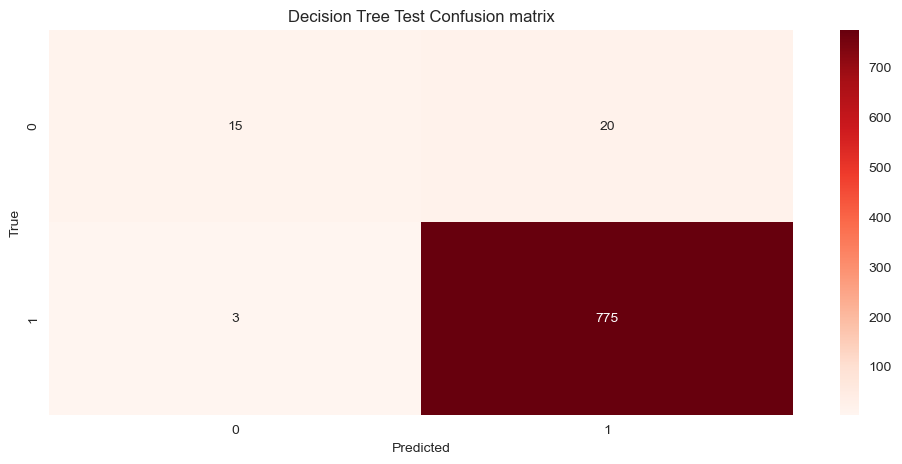

In [109]:
# 繪製混淆矩陣
plt.title('Decision Tree Test Confusion matrix')
sns.heatmap(test_cm, annot = True, cmap = 'Reds', fmt = 'g')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

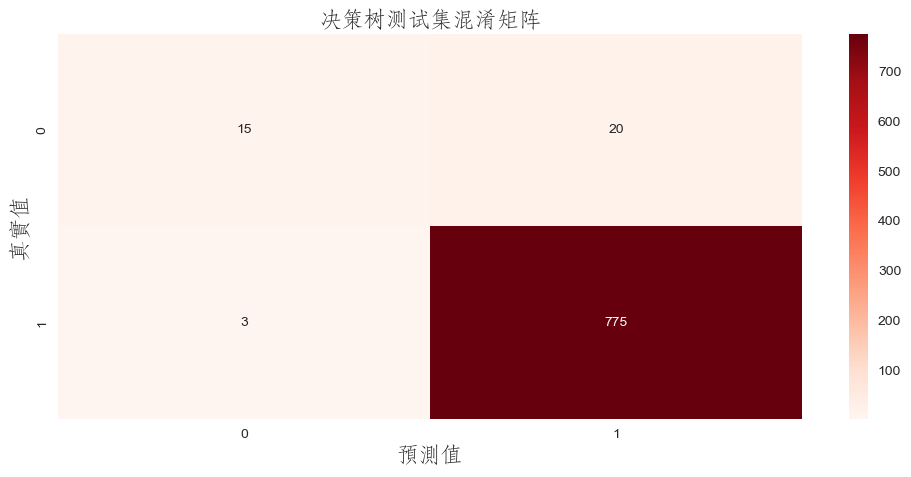

In [110]:
# 設定字體為中文
font = FontProperties(fname='/Users/sandra/Downloads/32515377567.ttf')
# 繪製混淆矩陣
plt.title('决策树测试集混淆矩阵', {'fontsize' : 16, 'fontproperties' : font})
sns.heatmap(test_cm, annot = True, cmap = 'Reds', fmt = 'g')
plt.xlabel('預測值', {'fontsize' : 16, 'fontproperties' : font})
plt.ylabel('真實值', {'fontsize' : 16, 'fontproperties' : font})
plt.show()

### 特征重要性分析

In [111]:
importances = dtc.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))

1. feature 10 (0.724607): per_backer_pledge
2. feature 7 (0.234415): usd_goal
3. feature 9 (0.030671): name_length
4. feature 1 (0.005251): goal
5. feature 4 (0.005056): whole_project
6. feature 12 (0.000000): staff_pick_True
7. feature 11 (0.000000): staff_pick_False
8. feature 8 (0.000000): blurb_length
9. feature 6 (0.000000): waiting_days
10. feature 5 (0.000000): duration
11. feature 3 (0.000000): is_starrable
12. feature 2 (0.000000): id
13. feature 0 (0.000000): country


# 決策樹

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 實例化決策樹模型並設置超參數
clf = DecisionTreeClassifier(max_depth = 3, random_state = 42)

# 訓練決策樹模型
clf.fit(X_train, y_train)

# 預測測試集中的y值
y_pred = clf.predict(X_test)

# 計算準確率和混淆矩陣
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 輸出結果
print('Accuracy:', acc)
print('Confusion matrix:')
print(cm)


Accuracy: 0.984009840098401
Confusion matrix:
[[ 30   5]
 [  8 770]]


In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 實例化決策樹模型並設置超參數
clf = DecisionTreeClassifier(max_depth = 4, random_state = 42)

# 訓練決策樹模型
clf.fit(X_train, y_train)

# 預測測試集中的y值
y_pred = clf.predict(X_test)

# 計算準確率和混淆矩陣
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 輸出結果
print('Accuracy:', acc)
print('Confusion matrix:')
print(cm)

Accuracy: 0.993849938499385
Confusion matrix:
[[ 30   5]
 [  0 778]]


In [37]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


1. feature 1 (0.745001): converted_pledged_amount
2. feature 10 (0.190336): usd_goal
3. feature 0 (0.057571): backers_count
4. feature 4 (0.007092): goal
5. feature 14 (0.000000): staff_pick_True
6. feature 13 (0.000000): staff_pick_False
7. feature 12 (0.000000): name_length
8. feature 11 (0.000000): blurb_length
9. feature 9 (0.000000): waiting_days
10. feature 8 (0.000000): duration
11. feature 7 (0.000000): whole_project
12. feature 6 (0.000000): is_starrable
13. feature 5 (0.000000): id
14. feature 3 (0.000000): disable_communication
15. feature 2 (0.000000): country


In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 將資料分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# 實例化決策樹模型並設置超參數
clf = DecisionTreeClassifier(max_depth = 5, random_state = 42)

# 訓練決策樹模型
clf.fit(X_train, y_train)

# 預測測試集中的y值
y_pred = clf.predict(X_test)

# 計算準確率和混淆矩陣
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# 輸出結果
print('Accuracy:', acc)
print('Confusion matrix:')
print(cm)

Accuracy: 0.995079950799508
Confusion matrix:
[[ 31   4]
 [  0 778]]


In [35]:
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X.shape[1]):
    print("%d. feature %d (%f): %s" % (f + 1, indices[f], importances[indices[f]], X.columns[indices[f]]))


1. feature 1 (0.659915): converted_pledged_amount
2. feature 10 (0.274621): usd_goal
3. feature 0 (0.050996): backers_count
4. feature 4 (0.014467): goal
5. feature 14 (0.000000): staff_pick_True
6. feature 13 (0.000000): staff_pick_False
7. feature 12 (0.000000): name_length
8. feature 11 (0.000000): blurb_length
9. feature 9 (0.000000): waiting_days
10. feature 8 (0.000000): duration
11. feature 7 (0.000000): whole_project
12. feature 6 (0.000000): is_starrable
13. feature 5 (0.000000): id
14. feature 3 (0.000000): disable_communication
15. feature 2 (0.000000): country


In [ ]:
# Plotting feature importance
n_features = X_train.shape[1]
plt.figure(figsize=(8,20))
plt.barh(range(n_features), best_rf.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X_train.columns.values) 
plt.title("Feature importances in the best Random Forest model")
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

### 局部解释性分析

In [68]:
import shap
import pandas as pd

# 创建shap解释器对象
explainer = shap.TreeExplainer(clf)

# 计算样本shap值
shap_values = explainer.shap_values(X)

# 可视化单个样本的shap值
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X.iloc[0,:])

# 可视化所有样本的shap值
shap.summary_plot(shap_values, X)


TypeError: list indices must be integers or slices, not tuple

In [ ]:
# 获取每个特征的shap值总和
shap.summary_plot(shap_values, X, plot_type="bar")

# 获取单个特征的shap值
shap.dependence_plot("actual_feature_name", shap_values, X)

### 混淆矩陣

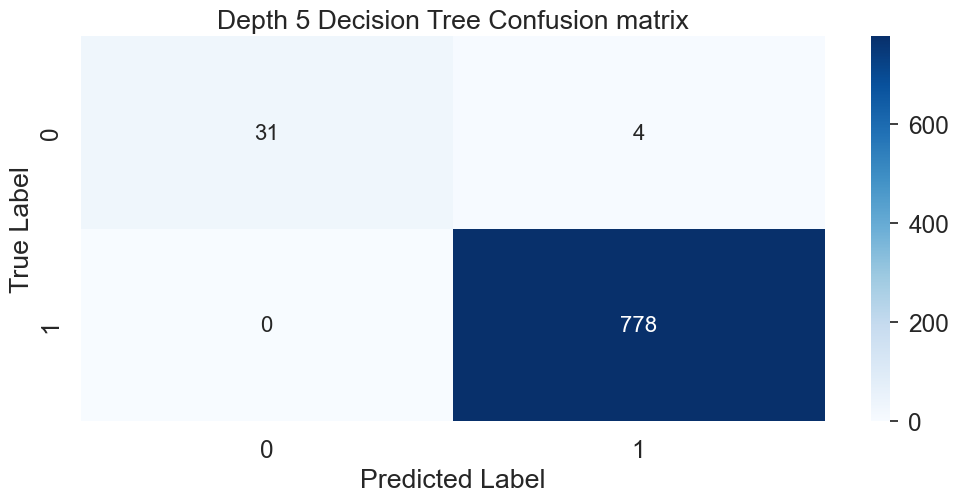

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(font_scale = 1.6) # 設置字體大小
plt.title('Depth 5 Decision Tree Confusion matrix')
sns.heatmap(cm, annot = True, annot_kws = {"size": 16}, fmt = 'g', cmap = 'Blues') # 繪製混淆矩陣圖
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.show()

In [33]:
import graphviz
# 導出決策樹
dot_data = export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=['failed', 'successful'], filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph.render('20-22 decision_tree')
graph.view()

NameError: name 'export_graphviz' is not defined

### 依據usd_goal將項目分組

In [ ]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('df_20_22_clear.csv')

# 計算 usd_goal 的統計值
goal_stats = df['usd_goal'].describe()

# 設定分組的閥值
low_threshold = goal_stats['25%']
high_threshold = goal_stats['75%']

# 依照 usd_goal 分成三個組別
low_group = df[df['usd_goal'] <= low_threshold]
mid_group = df[(df['usd_goal'] > low_threshold) & (df['usd_goal'] <= high_threshold)]
high_group = df[df['usd_goal'] > high_threshold]

# 將三個組別存成不同的 CSV 檔案
low_group.to_csv('low_goal_group.csv', index=False)
mid_group.to_csv('mid_goal_group.csv', index=False)
high_group.to_csv('high_goal_group.csv', index=False)


### 依據duration將項目分組

In [ ]:
import pandas as pd

# 讀取 CSV 檔案
df = pd.read_csv('df_20_22_clear.csv')

# 計算 usd_goal 的統計值
goal_stats = df['duration'].describe()

# 設定分組的閥值
low_threshold = goal_stats['25%']
high_threshold = goal_stats['75%']

# 依照 usd_goal 分成三個組別
low_group = df[df['duration'] <= low_threshold]
mid_group = df[(df['duration'] > low_threshold) & (df['duration'] <= high_threshold)]
high_group = df[df['duration'] > high_threshold]

# 將三個組別存成不同的 CSV 檔案
low_group.to_csv('low_duration_group.csv', index=False)
mid_group.to_csv('mid_duration_group.csv', index=False)
high_group.to_csv('high_duration_group.csv', index=False)
